# 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = None

# 2. Load data set

In [2]:
#load train, test dataset and save columns in the list
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv', sep=','); columns = train.columns.tolist(); test =pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv', sep=',')

## About features 

| Column                          | Description                                                                                                                                                  |
|---------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `id`                            | Unique identifier for each record, with no influence on the prediction.                                                                                      |
| `Name`                          | Name of the survey participant, likely not relevant for analysis and could be ignored or removed.                                                            |
| `Gender`                        | Gender of the individual, potentially an important factor in mental health analyses. Values may include "Male," "Female," or "Other."                        |
| `Age`                           | Age of the individual, a numerical variable that may influence depression risk factors. Age groups could simplify analysis.                                 |
| `City`                          | City of residence of the individual, possibly indicating geographic variations in mental health factors.                                                    |
| `Working Professional or Student` | Status of the individual (working professional or student), affecting stress levels ("Working" for professionals, "Student" for students).                |
| `Profession`                    | Type of profession, a categorical variable that could provide insights into work-related pressure.                                                          |
| `Academic Pressure`             | Level of academic pressure felt, particularly relevant for students, likely represented on a scale or as a numerical measure.                              |
| `Work Pressure`                 | Level of work pressure, represented on a scale or as a numerical value, important for professionals.                                                        |
| `CGPA`                          | Cumulative Grade Point Average, an academic performance indicator for students, possibly related to academic pressure.                                      |
| `Study Satisfaction`            | Level of satisfaction with studies, possibly measured on a numerical or categorical scale (e.g., "Satisfied," "Dissatisfied").                             |
| `Job Satisfaction`              | Level of satisfaction with work, also on a numerical or categorical scale, influencing mental health among professionals.                                   |
| `Sleep Duration`                | Average sleep duration in hours, a well-documented factor influencing mental health.                                                                       |
| `Dietary Habits`                | Dietary habits, potentially categorized (e.g., "Healthy," "Moderate," "Poor") and affecting mental health.                                                  |
| `Degree`                        | Educational level attained (e.g., "Bachelor's," "Master's"), possibly providing socio-economic insights.                                                   |
| `Have you ever had suicidal thoughts?` | Binary indicator of past suicidal thoughts, a significant predictive factor for depression.                                                         |
| `Work/Study Hours`              | Average daily hours spent working or studying, indicating stress or burnout.                                                                               |
| `Financial Stress`              | Level of financial stress, likely measured on a numerical scale, possibly affecting mental health.                                                          |
| `Family History of Mental Illness` | Binary indicator (yes/no) of family history of mental illness, a recognized risk factor for depression.                                               |
| `Depression`                    | Target variable indicating whether the individual suffers from depression (binary: yes/no).                                                                 |


In [3]:
train.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


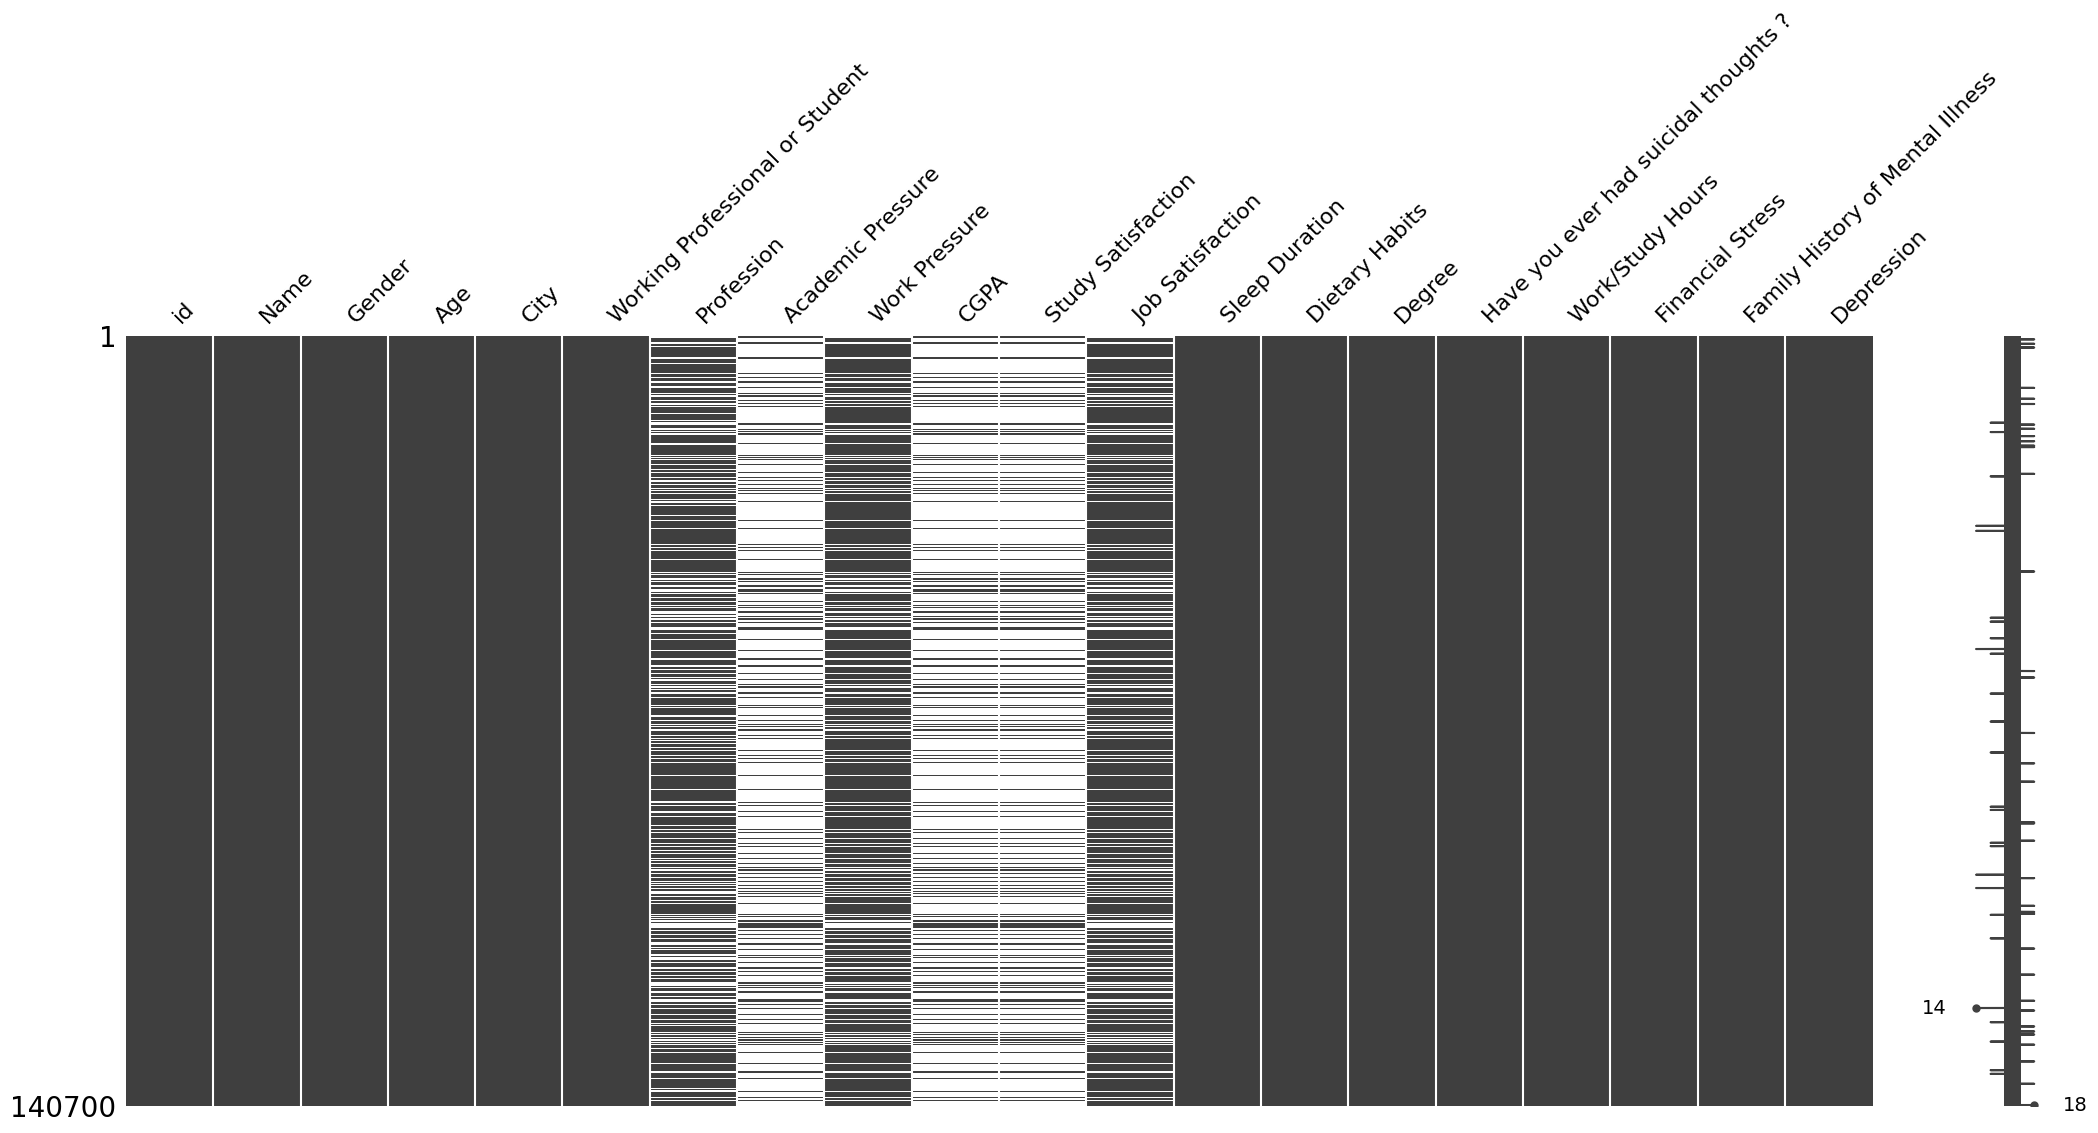

In [4]:
# Visualize missing data
msno.matrix(train)
plt.show()

We can observe that the data is perfectly logical: indeed, for an individual who is a student, they will not have a profession, work pressure, or job satisfaction, but rather academic pressure, CGPA, and study satisfaction.

Thus, at this stage, careful attention is required when imputing missing values.

In [5]:
print(train.shape)
print("="*50)
print(f"Is na in train set :\n{train.isna().sum()}")
print("="*50)

(140700, 20)
Is na in train set :
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype:

We can observe that there are missing values in the columns Job Satisfaction, Study Satisfaction, CGPA, Work Pressure, and Academic Pressure. These missing values are logically consistent, as explained in Markdown 1.
> However, with regard to *Work Pressure*, we have an additional 8 missing values. It is essential for us to identify and impute these missing values according to the established rules.

In [6]:
print(test.shape)
print("="*50)
print(f"Is na in test set :\n{test.isna().sum()}")
print("="*50)

(93800, 19)
Is na in test set :
id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64


In [7]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Dataset Summary and Detailed Interpretations

This section provides a detailed analysis of the dataset based on key statistics. Each variable is explained with insights into the distribution and significance of the data.

---

__Age__
- **Average**: 40.39 years
- **Minimum**: 18 years
- **Maximum**: 60 years
- **Standard Deviation**: 12.38 years
- **Quartiles**:
  - 25% of participants are under 29 years
  - 50% are under 42 years
  - 75% are under 51 years

The average age is around 40, with a wide age range suggesting a diverse sample group.

---

__Academic Pressure__
- **Range**: 1 to 5
- **Average**: 3.14
- **Standard Deviation**: 1.38
- **Quartiles**:
  - 25% report a pressure level of 2 or less
  - 50% fall between levels 2 and 4

Academic pressure appears to vary significantly among participants, with an average rating close to 3.

---

__Work Pressure__
- **Range**: 1 to 5
- **Average**: 2.99
- **Standard Deviation**: 1.41
- **Quartiles**:
  - 25% report a pressure level of 2 or less
  - 50% are between levels 2 and 4

Work pressure shows a similar distribution to academic pressure, with a central tendency close to 3.

---

__CGPA__
- **Range**: 5.03 to 10
- **Average**: 7.66
- **Standard Deviation**: 1.46
- **Quartiles**:
  - 25% have a CGPA below 6.29
  - 50% are between 6.29 and 8.92

The CGPA distribution suggests a generally high academic performance, though values cover a wide range.

---

__Study Satisfaction__
- **Range**: 1 to 5
- **Average**: 2.94
- **Standard Deviation**: 1.36
- **Quartiles**:
  - 25% report a satisfaction level of 2 or less
  - 50% have a satisfaction level between 2 and 4

The average study satisfaction score of nearly 3 indicates moderate satisfaction.

---

__Job Satisfaction__
- **Range**: 1 to 5
- **Average**: 2.97
- **Standard Deviation**: 1.42
- **Quartiles**:
  - 25% report a satisfaction level of 2 or less
  - 50% fall between levels 2 and 4

Job satisfaction is similarly moderate, mirroring study satisfaction.

---

__Work/Study Hours__
- **Range**: 0 to 12 hours
- **Average**: 6.25 hours
- **Standard Deviation**: 3.85 hours
- **Quartiles**:
  - 25% spend 3 hours or fewer
  - 50% spend between 3 and 10 hours

There is substantial variability in hours spent on work or study, with most participants averaging around 6 hours.

---

__Financial Stress__
- **Range**: 1 to 5
- **Average**: 2.99
- **Standard Deviation**: 1.41
- **Quartiles**:
  - 25% report a stress level of 2 or less
  - 50% are between levels 2 and 4

Financial stress is moderate, showing similar patterns to work and academic pressure.

---

__Depression__
- **Range**: 0 to 1
- **Average**: 0.18 (18% experience symptoms of depression)
- **Standard Deviation**: 0.39

The average score of 0.18 suggests that a minority of participants show symptoms of depression.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

## Manage missing values

In [9]:
train.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


**Manage tran's missing value** 

**Key Differences:**

**For Students:**
Academic Variables: Academic Pressure, CGPA, Study Satisfaction
No Profession, Work Pressure, or Job Satisfaction

**For Workers:**
Professional Variables: Profession, Work Pressure, Job Satisfaction
No Academic Pressure, CGPA, or Study Satisfaction

In [10]:
train.loc[train["Working Professional or Student"] == "Student", "Job Satisfaction"] = 0
train.loc[train["Working Professional or Student"] == "Student", "Work Pressure"] = 0
train.loc[train["Working Professional or Student"] == "Student", "Profession"] = "Non Applicable"

train.loc[train["Working Professional or Student"] == "Working Professional", "Study Satisfaction"] = 0
train.loc[train["Working Professional or Student"] == "Working Professional", "CGPA"] = 0
train.loc[train["Working Professional or Student"] == "Working Professional", "Academic Pressure"] = 0

In [11]:
train.isna().sum()

id                                          0
Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                               8763
Academic Pressure                           9
Work Pressure                              20
CGPA                                        9
Study Satisfaction                         10
Job Satisfaction                           17
Sleep Duration                              0
Dietary Habits                              4
Degree                                      2
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            4
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [12]:
# Occupation' imputation based on “Work Pressure” and ’Job Satisfaction
train['Profession'] = train.groupby(['Work Pressure', 'Job Satisfaction'])['Profession'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

# Imputation of academic variables for students
student_mask = (train["Working Professional or Student"] == "Student")
train.loc[student_mask, "Academic Pressure"] = train.loc[student_mask, "Academic Pressure"].fillna(
    train[student_mask]["Academic Pressure"].median()
)
train.loc[student_mask, "CGPA"] = train.loc[student_mask, "CGPA"].fillna(
    train[student_mask]["CGPA"].median()
)
train.loc[student_mask, "Study Satisfaction"] = train.loc[student_mask, "Study Satisfaction"].fillna(
    train[student_mask]["Study Satisfaction"].median()
)

# Charging work variables for professionals
professional_mask = (train["Working Professional or Student"] == "Working Professional")
train.loc[professional_mask, "Work Pressure"] = train.loc[professional_mask, "Work Pressure"].fillna(
    train[professional_mask]["Work Pressure"].median()
)

# Imputation of remaining values by logical group or ‘Unknown’ category
train.fillna({'Dietary Habits': 'Unknown', 'Financial Stress': train['Financial Stress'].median()}, inplace=True)


In [13]:
missing_degree_data = train[train["Degree"].isna()]
missing_degree_data.head(50) 

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
110064,110064,Riya,Female,28.0,Srinagar,Working Professional,Teacher,0.0,3.0,0.0,0.0,3.0,5-6 hours,Unhealthy,NaN,Yes,4.0,2.0,Yes,1
128934,128934,Anaya,Female,28.0,Srinagar,Working Professional,Teacher,0.0,5.0,0.0,0.0,4.0,Less than 5 hours,Unhealthy,NaN,Yes,3.0,3.0,Yes,0


In [14]:
# Display rows where the "Degree" column has missing values
missing_degree_data = train[((train['id'] >= 110000) & (train['id'] <= 130000))&(train["Profession"] == "Teacher")&(train["Gender"]=="Female")&(train["Age"]==28)&(train["Dietary Habits"]=="Unhealthy")&(train["Have you ever had suicidal thoughts ?"]=="Yes")]
missing_degree_data


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
110064,110064,Riya,Female,28.0,Srinagar,Working Professional,Teacher,0.0,3.0,0.0,0.0,3.0,5-6 hours,Unhealthy,NaN,Yes,4.0,2.0,Yes,1
110826,110826,Shreya,Female,28.0,Pune,Working Professional,Teacher,0.0,5.0,0.0,0.0,1.0,5-6 hours,Unhealthy,LLB,Yes,10.0,4.0,Yes,1
110973,110973,Rashi,Female,28.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.0,0.0,5.0,Less than 5 hours,Unhealthy,BA,Yes,6.0,1.0,No,0
113444,113444,Rashi,Female,28.0,Mumbai,Working Professional,Teacher,0.0,2.0,0.0,0.0,3.0,Less than 5 hours,Unhealthy,BA,Yes,6.0,1.0,No,0
116644,116644,Aaradhya,Female,28.0,Meerut,Working Professional,Teacher,0.0,3.0,0.0,0.0,5.0,More than 8 hours,Unhealthy,B.Pharm,Yes,0.0,2.0,No,0
118960,118960,Rupal,Female,28.0,Nagpur,Working Professional,Teacher,0.0,1.0,0.0,0.0,1.0,5-6 hours,Unhealthy,M.Com,Yes,3.0,3.0,Yes,1
121165,121165,Ishita,Female,28.0,Vadodara,Working Professional,Teacher,0.0,5.0,0.0,0.0,1.0,7-8 hours,Unhealthy,B.Pharm,Yes,11.0,5.0,No,1
123847,123847,Saanvi,Female,28.0,Patna,Working Professional,Teacher,0.0,4.0,0.0,0.0,1.0,7-8 hours,Unhealthy,B.Ed,Yes,12.0,3.0,No,1
128934,128934,Anaya,Female,28.0,Srinagar,Working Professional,Teacher,0.0,5.0,0.0,0.0,4.0,Less than 5 hours,Unhealthy,NaN,Yes,3.0,3.0,Yes,0


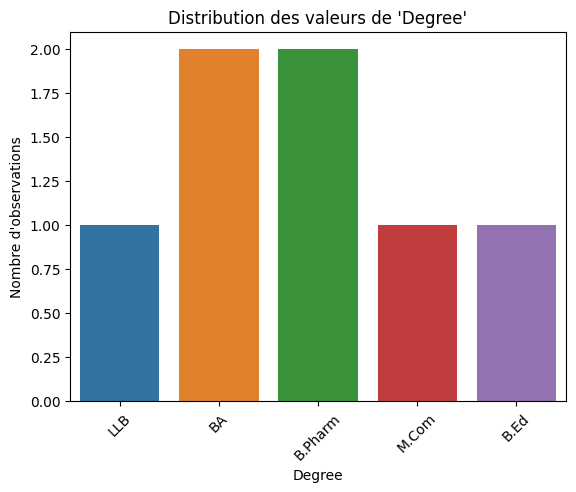

In [15]:
if not missing_degree_data['Degree'].isnull().all():
   
    sns.countplot(data=missing_degree_data, x='Degree')
    plt.title("Distribution des valeurs de 'Degree'")
    plt.xlabel("Degree")
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Toutes les valeurs de 'Degree' sont manquantes pour les critères spécifiés.")

In [16]:
# Imput missing values
train.loc[train['id'] == 110064, 'Degree'] = 'M.Com'
train.loc[train['id'] == 128934, 'Degree'] = 'BA'

# Check changes
train[train['id'].isin([110064, 128934])]


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
110064,110064,Riya,Female,28.0,Srinagar,Working Professional,Teacher,0.0,3.0,0.0,0.0,3.0,5-6 hours,Unhealthy,M.Com,Yes,4.0,2.0,Yes,1
128934,128934,Anaya,Female,28.0,Srinagar,Working Professional,Teacher,0.0,5.0,0.0,0.0,4.0,Less than 5 hours,Unhealthy,BA,Yes,3.0,3.0,Yes,0


In [17]:
# Delete lines where ‘Profession’ is missing
train = train.dropna(subset=['Profession'])
train.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

**Missing Value Imputation Process**

- **"Degree" Column:**
  The missing values in the "Degree" column were imputed using an approach based on correlated variables such as "Age," "Profession," and "Dietary Habits." This method was chosen to preserve data integrity and utilize relevant information to logically and contextually estimate the missing values.

- **"Profession" Column:**
  For the "Profession" column, the 25 missing rows were removed as they did not provide sufficient valid information, and their removal did not compromise the quality of the model. By removing these rows, the 17 missing rows in the "Job Satisfaction" variable were also eliminated. This helps improve the quality of the remaining data and ensures that the models are not biased by incomplete or inconsistent data.


**Manage test's missing values**

In [18]:
# Logical allocation for students
test.loc[test["Working Professional or Student"] == "Student", "Job Satisfaction"] = 0
test.loc[test["Working Professional or Student"] == "Student", "Work Pressure"] = 0
test.loc[test["Working Professional or Student"] == "Student", "Profession"] = "Non Applicable"

# Logical allocation for workers
test.loc[test["Working Professional or Student"] == "Working Professional", "Study Satisfaction"] = 0
test.loc[test["Working Professional or Student"] == "Working Professional", "CGPA"] = 0
test.loc[test["Working Professional or Student"] == "Working Professional", "Academic Pressure"] = 0

# Occupation' imputation based on “Work Pressure” and ’Job Satisfaction
test['Profession'] = test.groupby(['Work Pressure', 'Job Satisfaction'])['Profession'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

# Imputation of academic variables for students
student_mask = (test["Working Professional or Student"] == "Student")
test.loc[student_mask, "Academic Pressure"] = test.loc[student_mask, "Academic Pressure"].fillna(
    test[student_mask]["Academic Pressure"].median()
)
test.loc[student_mask, "CGPA"] = test.loc[student_mask, "CGPA"].fillna(
    test[student_mask]["CGPA"].median()
)
test.loc[student_mask, "Study Satisfaction"] = test.loc[student_mask, "Study Satisfaction"].fillna(
    test[student_mask]["Study Satisfaction"].median()
)

# Charging work variables for professionals
professional_mask = (test["Working Professional or Student"] == "Working Professional")
test.loc[professional_mask, "Work Pressure"] = test.loc[professional_mask, "Work Pressure"].fillna(
    test[professional_mask]["Work Pressure"].median()
)

# Imputation of remaining values by logical group or ‘Unknown’ category
test.fillna({'Dietary Habits': 'Unknown', 'Financial Stress': test['Financial Stress'].median()}, inplace=True)

# Imput missing values for ‘Job Satisfaction’ by the median
test['Job Satisfaction'].fillna(test['Job Satisfaction'].median(), inplace=True)

In [19]:
test.isna().sum()

id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                               13
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                            0
Dietary Habits                            0
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
dtype: int64

In [20]:
missing_degree_data = test[test["Degree"].isna()]
missing_degree_data 

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
56708,197408,Aishwarya,Female,20.0,Ludhiana,Working Professional,HR Manager,0.0,4.0,0.00,0.0,1.0,Less than 5 hours,Healthy,NaN,Yes,2.0,1.0,No
92998,233698,Charvi,Female,32.0,Varanasi,Student,Non Applicable,1.0,0.0,6.83,3.0,0.0,Less than 5 hours,Unhealthy,NaN,No,0.0,4.0,No


In [21]:
# Display rows where the column ‘Degree’ has missing values in the ‘test’ dataset
missing_degree_data = test[
    ((test['id'] >= 190000) & (test['id'] <= 233698)) & 
    #(test['Age'] == 20) &
     (test['Age'] == 32.0)&
    (test['Profession'] == "Non Applicable")&
    #(test['Profession'] == "HR Manager")&
    (test["Gender"] == "Female") &  
    (test["Sleep Duration"] == "Less than 5 hours") & 
    (test["Dietary Habits"] == "Unhealthy") & 
    (test["Family History of Mental Illness"] == "No")  
]
missing_degree_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
50920,191620,Gauri,Female,32.0,Ghaziabad,Student,Non Applicable,3.0,0.0,8.90,2.0,0.0,Less than 5 hours,Unhealthy,MBBS,Yes,10.0,5.0,No
54707,195407,Mahi,Female,32.0,Vadodara,Student,Non Applicable,5.0,0.0,8.21,2.0,0.0,Less than 5 hours,Unhealthy,Class 12,Yes,11.0,4.0,No
55335,196035,Ira,Female,32.0,Kalyan,Student,Non Applicable,1.0,0.0,5.88,3.0,0.0,Less than 5 hours,Unhealthy,M.Ed,No,10.0,1.0,No
55623,196323,Nikita,Female,32.0,Agra,Student,Non Applicable,4.0,0.0,6.59,1.0,0.0,Less than 5 hours,Unhealthy,B.Com,No,6.0,1.0,No
60513,201213,Ishaani,Female,32.0,Rajkot,Student,Non Applicable,4.0,0.0,5.72,1.0,0.0,Less than 5 hours,Unhealthy,M.Com,Yes,2.0,1.0,No
67865,208565,Veda,Female,32.0,Ghaziabad,Student,Non Applicable,2.0,0.0,9.95,4.0,0.0,Less than 5 hours,Unhealthy,B.Arch,Yes,7.0,5.0,No
92998,233698,Charvi,Female,32.0,Varanasi,Student,Non Applicable,1.0,0.0,6.83,3.0,0.0,Less than 5 hours,Unhealthy,NaN,No,0.0,4.0,No


In [22]:
test.loc[test['id'] == 197408, 'Degree'] = 'M.Tech'
test.loc[test['id'] == 233698, 'Degree'] = 'M.Ed'

In [23]:
test.isna().sum()

id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                               13
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                            0
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
dtype: int64

In [24]:
missing_degree_data = test[test['Profession'].isna()]
missing_degree_data 

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
4931,145631,Tina,Female,18.0,Srinagar,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,More than 8 hours,Unhealthy,Class 12,Yes,6.0,4.0,No
9005,149705,Anand,Male,18.0,Vasai-Virar,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,Less than 5 hours,Unhealthy,Class 12,Yes,9.0,4.0,No
12603,153303,Rashi,Female,19.0,Srinagar,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,5-6 hours,Healthy,Class 12,Yes,9.0,2.0,Yes
20226,160926,Himani,Female,19.0,Rajkot,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,Less than 5 hours,Moderate,Class 12,Yes,0.0,5.0,Yes
25318,166018,Samar,Male,24.0,Rajkot,Working Professional,NaN,0.0,5.0,0.0,0.0,2.0,5-6 hours,Unhealthy,Class 12,Yes,3.0,5.0,Yes
31133,171833,Sanya,Female,33.0,Kolkata,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,More than 8 hours,Healthy,MCA,Yes,11.0,1.0,Yes
31798,172498,Janvi,Female,28.0,Mumbai,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,5-6 hours,Unhealthy,BCA,Yes,8.0,4.0,No
34047,174747,Saanvi,Female,50.0,Thane,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,Less than 5 hours,Unhealthy,Class 12,Yes,2.0,5.0,No
41076,181776,Ila,Female,52.0,Kanpur,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,7-8 hours,Unhealthy,M.Pharm,Yes,3.0,3.0,No
48976,189676,Tanisha,Female,37.0,Thane,Working Professional,NaN,0.0,3.0,0.0,0.0,2.0,Less than 5 hours,Moderate,LLB,Yes,0.0,2.0,Yes


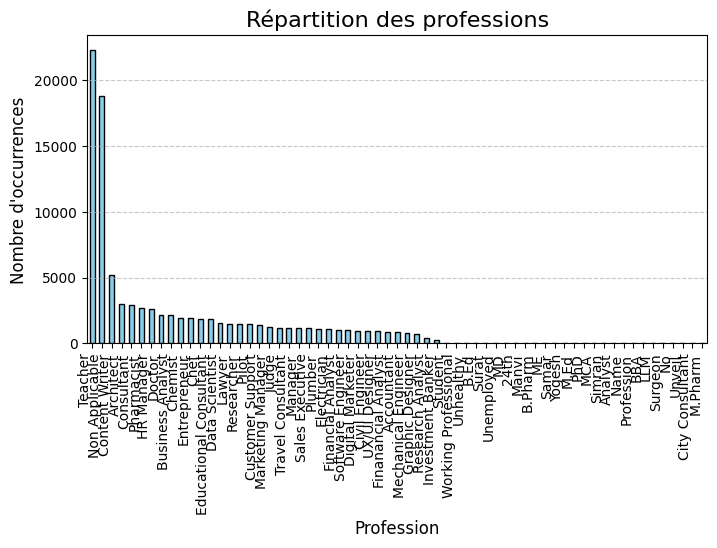

In [25]:
profession_distribution = test["Profession"].value_counts()

# Display the breakdown of professions
plt.figure(figsize=(8, 4))
profession_distribution.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Répartition des professions", fontsize=16)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=90, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [26]:
def preparing_data(df):
    print(f"Missing Value : {df.isna().sum().sum()}\n")
    print("=" * 75)
    print(f"Duplicate value : {df.duplicated().sum().sum()}")
    print("=" * 75)
    print(f"target value : {train[columns[-1]].unique()}")
    print("=" * 75)
    print(f"train info data : {df.info(max_cols=37)}")
    print("=" * 75)
    print(f"train shape: {df.shape}")


def print_unique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        print(f"{column} unique value : {unique_values}")
        print("=" * 75)

def print_count_values(dataframe, columns):
    for column in columns:
        count_value  = dataframe[column].value_counts()
        print(f"{column} number of occurences : {count_value}")
        print("=" * 75)
    
def print_nunique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].nunique()
        print(f"{column} unique value : {unique_values}")
        print("=" * 75)

In [27]:
preparing_data(test)

Missing Value : 13

Duplicate value : 0
target value : [0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             93787 non-null  object 
 7   Academic Pressure                      93800 non-null  float64
 8   Work Pressure                          93800 non-null  float64
 9   CGPA                                   93800 non-null  float64
 10  Study Sat

In [28]:
column = test.columns.to_list()
print_unique_values(test, column[2:])

Gender unique value : ['Male' 'Female']
Age unique value : [53.   58.   23.   47.   29.   28.   21.   45.   44.   48.   18.   52.
 34.   49.   26.   32.   41.   42.   25.   43.   20.   33.   19.   51.
 46.   59.   39.   50.   55.   54.   38.   35.   57.   56.   37.   36.
 40.   22.   30.   31.   60.   24.   27.   32.08]
City unique value : ['Visakhapatnam' 'Kolkata' 'Jaipur' 'Rajkot' 'Kalyan' 'Mumbai' 'Surat'
 'Srinagar' 'Delhi' 'Lucknow' 'Thane' 'Meerut' 'Nagpur' 'Ghaziabad'
 'Chennai' 'Varanasi' 'Indore' 'Pune' 'Hyderabad' 'Kanpur' 'Nashik'
 'Bhopal' 'Faridabad' 'Bangalore' 'Vasai-Virar' 'Ludhiana' 'Patna'
 'Vadodara' 'Ahmedabad' 'Agra' 'Malyan' 'Pratyush' 'Vidya'
 'Less than 5 hours' 'Aditi' 'Keshav' 'Nalini' 'Mhopal' 'Avni' 'Ira'
 'Vaishnavi' 'Bhavna' 'Lawyer' 'Thani' 'Hrithik' 'City' 'Unaly'
 'Is Kanpur' 'Golkata' 'Less Delhi' 'Sara' 'Saurav' 'Vikram' 'Parth'
 'Siddhesh' 'Vaikot' 'Leela' 'Chemist' 'San Vasai-Virar' 'No' 'More Delhi'
 'Saanvi' 'Pratham' 'Vidhi' 'Abhinav' 'Rolkata' 

In [29]:
# Occupation' imputation based on “Work Pressure” and ’Job Satisfaction
test['Profession'] = test.groupby(['Work Pressure', 'Job Satisfaction'])['Profession'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

In [30]:
test.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

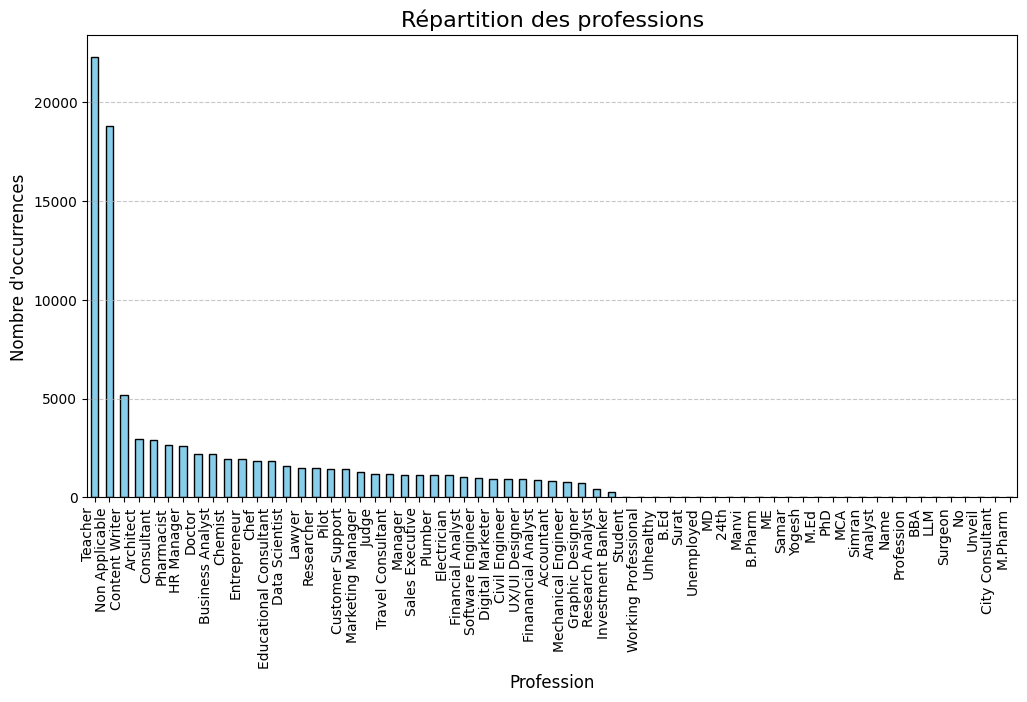

In [31]:
plt.figure(figsize=(12, 6))
profession_distribution.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Répartition des professions", fontsize=16)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=90, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 3. Data visualisation 

Text(0, 0.5, 'Fréquence')

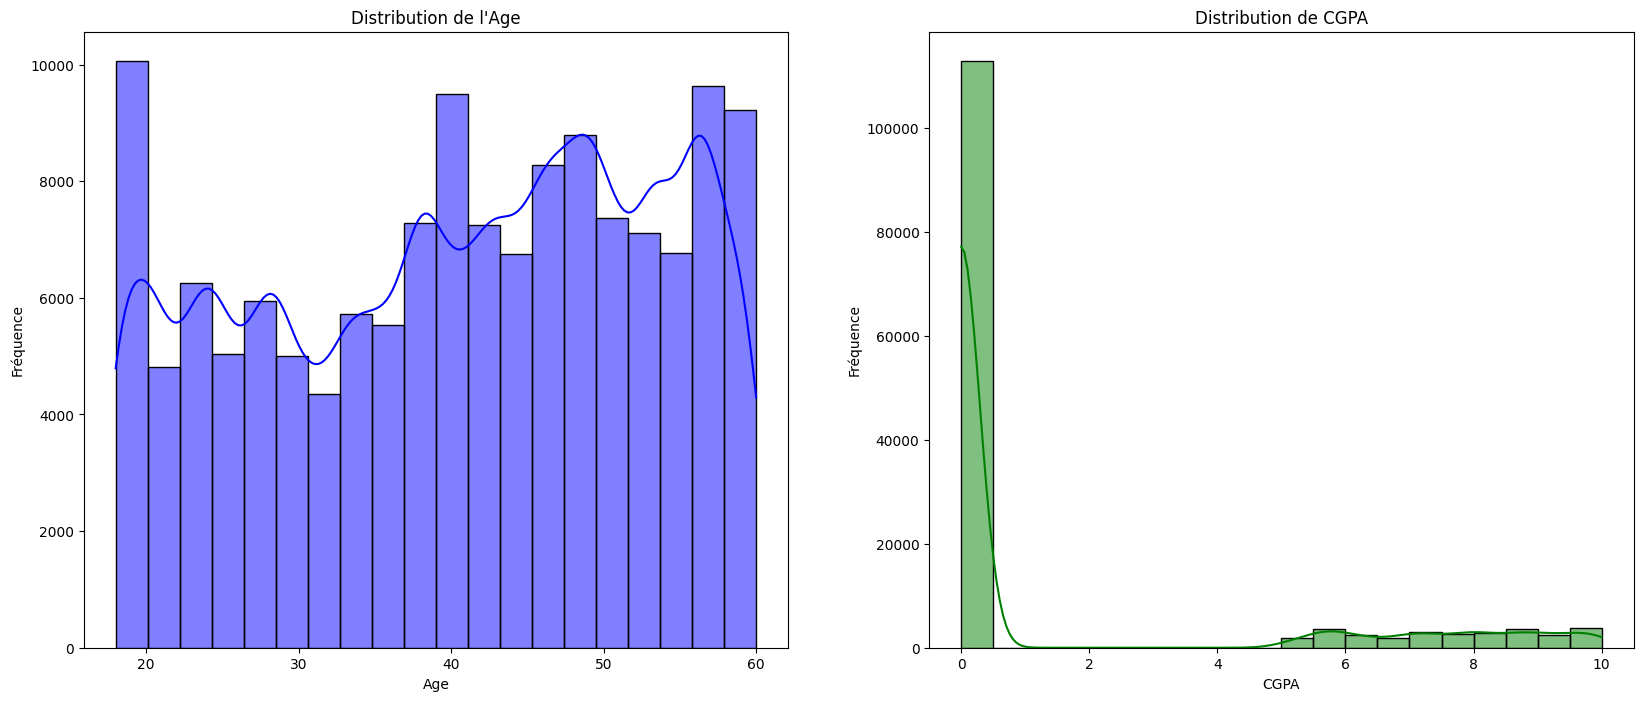

In [32]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1) 
sns.histplot(train['Age'], kde=True, color='blue', bins=20)
plt.title("Distribution de l'Age")
plt.xlabel('Age')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2) 
sns.histplot(train['CGPA'], kde=True, color='green', bins=20)
plt.title("Distribution de CGPA")
plt.xlabel('CGPA')
plt.ylabel('Fréquence')

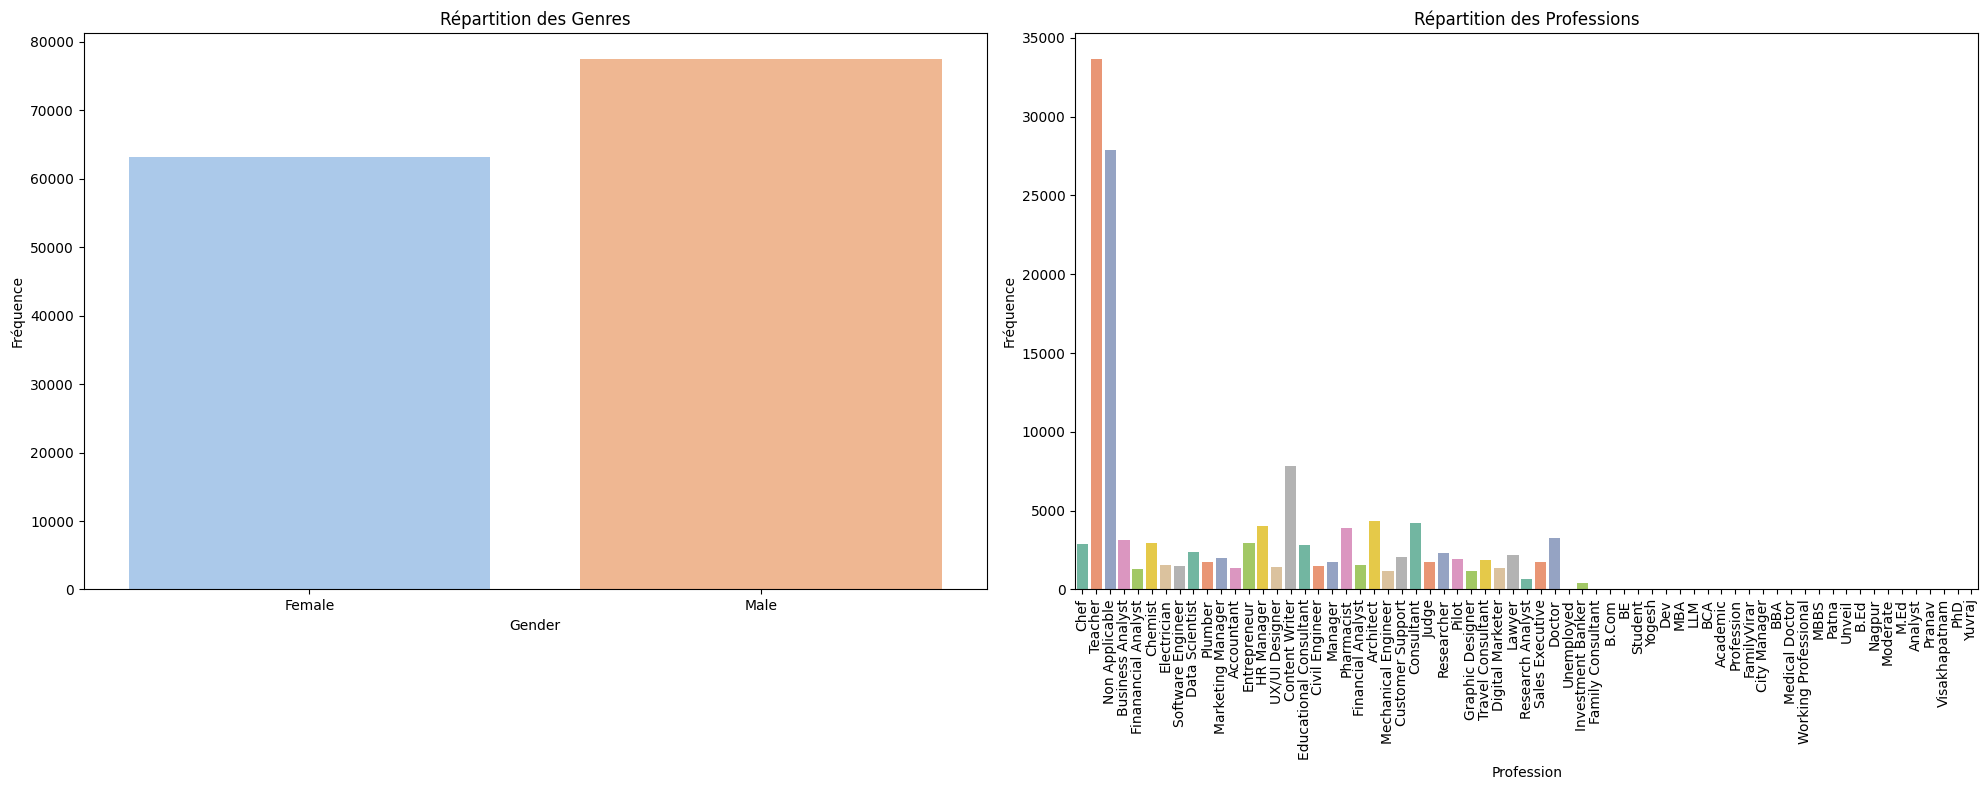

In [33]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)  
sns.countplot(x='Gender', data=train, palette='pastel')
plt.title("Répartition des Genres")
plt.xlabel('Gender')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)  
sns.countplot(x='Profession', data=train, palette='Set2')
plt.title("Répartition des Professions")
plt.xlabel('Profession')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)  

plt.tight_layout() 
plt.show()

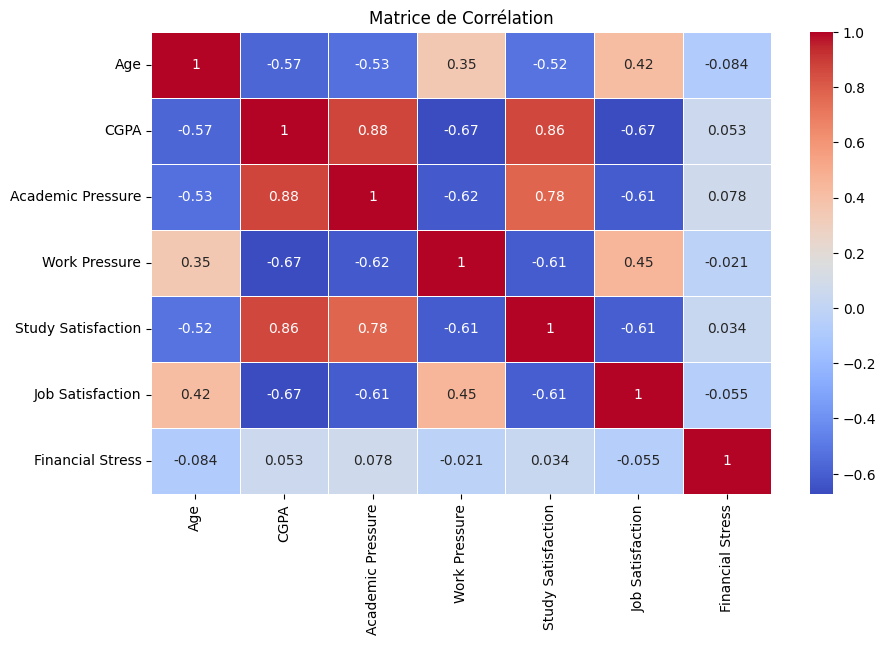

In [34]:
corr_matrix = train[['Age', 'CGPA', 'Academic Pressure', 'Work Pressure', 
                     'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


Text(0, 0.5, 'Fréquence')

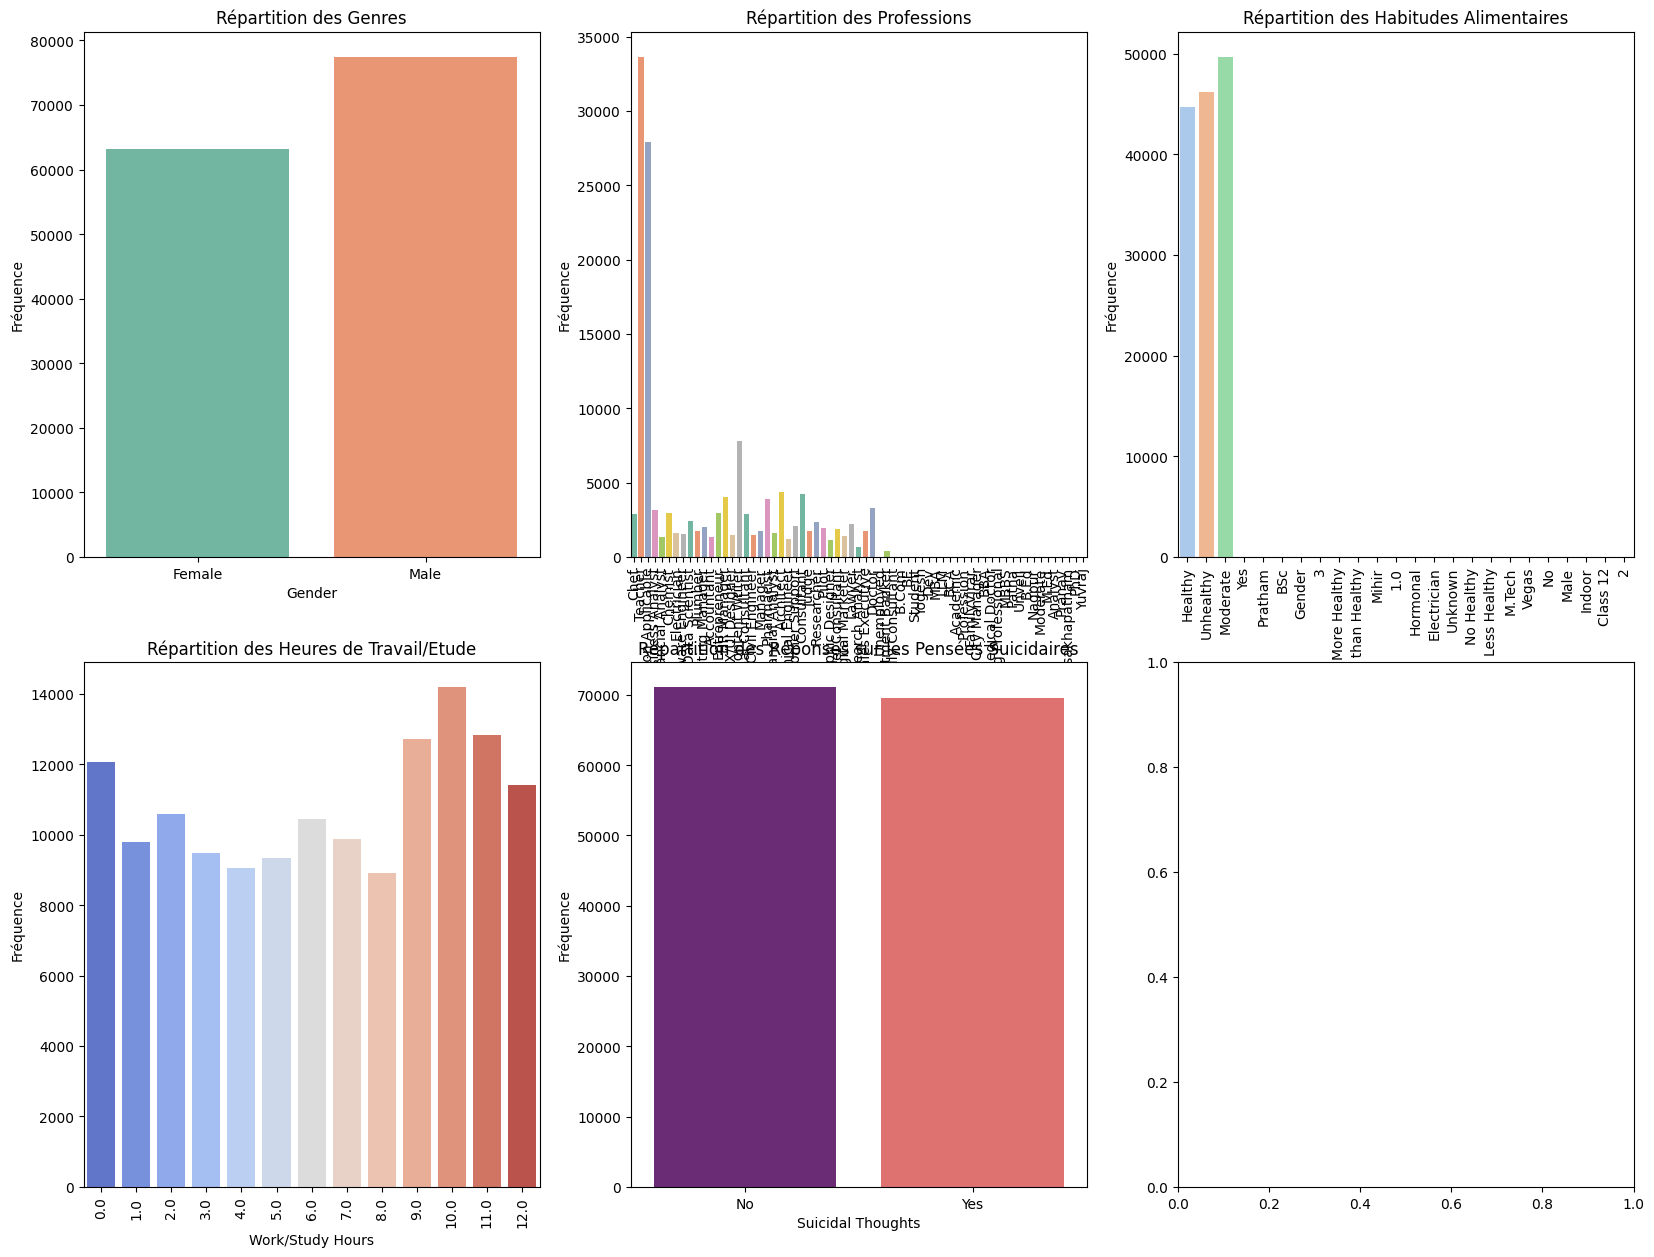

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

sns.countplot(x='Gender', data=train, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title("Répartition des Genres")
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Fréquence')

sns.countplot(x='Profession', data=train, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title("Répartition des Professions")
axes[0, 1].set_xlabel('Profession')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(x='Dietary Habits', data=train, palette='pastel', ax=axes[0, 2])
axes[0, 2].set_title("Répartition des Habitudes Alimentaires")
axes[0, 2].set_xlabel('Dietary Habits')
axes[0, 2].set_ylabel('Fréquence')
axes[0, 2].tick_params(axis='x', rotation=90)

sns.countplot(x='Work/Study Hours', data=train, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("Répartition des Heures de Travail/Etude")
axes[1, 0].set_xlabel('Work/Study Hours')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='Have you ever had suicidal thoughts ?', data=train, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title("Répartition des Réponses sur les Pensées Suicidaires")
axes[1, 1].set_xlabel('Suicidal Thoughts')
axes[1, 1].set_ylabel('Fréquence')

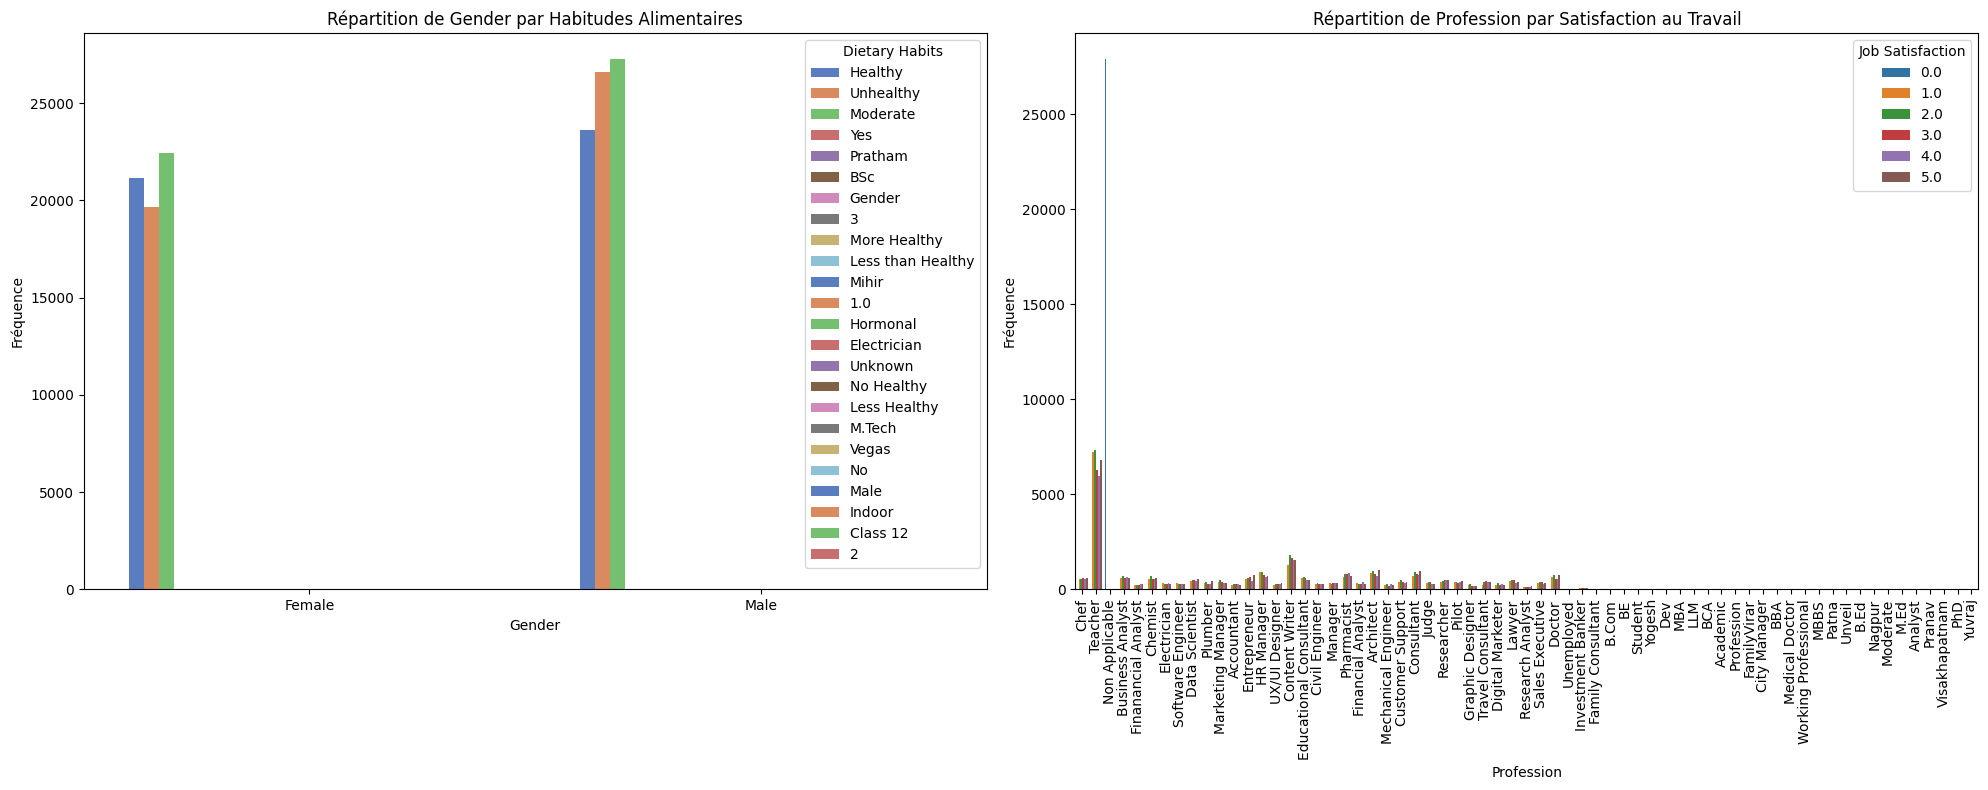

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(x='Gender', hue='Dietary Habits', data=train, palette='muted', ax=axes[0])
axes[0].set_title("Répartition de Gender par Habitudes Alimentaires")
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Fréquence')

sns.countplot(x='Profession', hue='Job Satisfaction', data=train, ax=axes[1])
axes[1].set_title("Répartition de Profession par Satisfaction au Travail")
axes[1].set_xlabel('Profession')
axes[1].set_ylabel('Fréquence')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

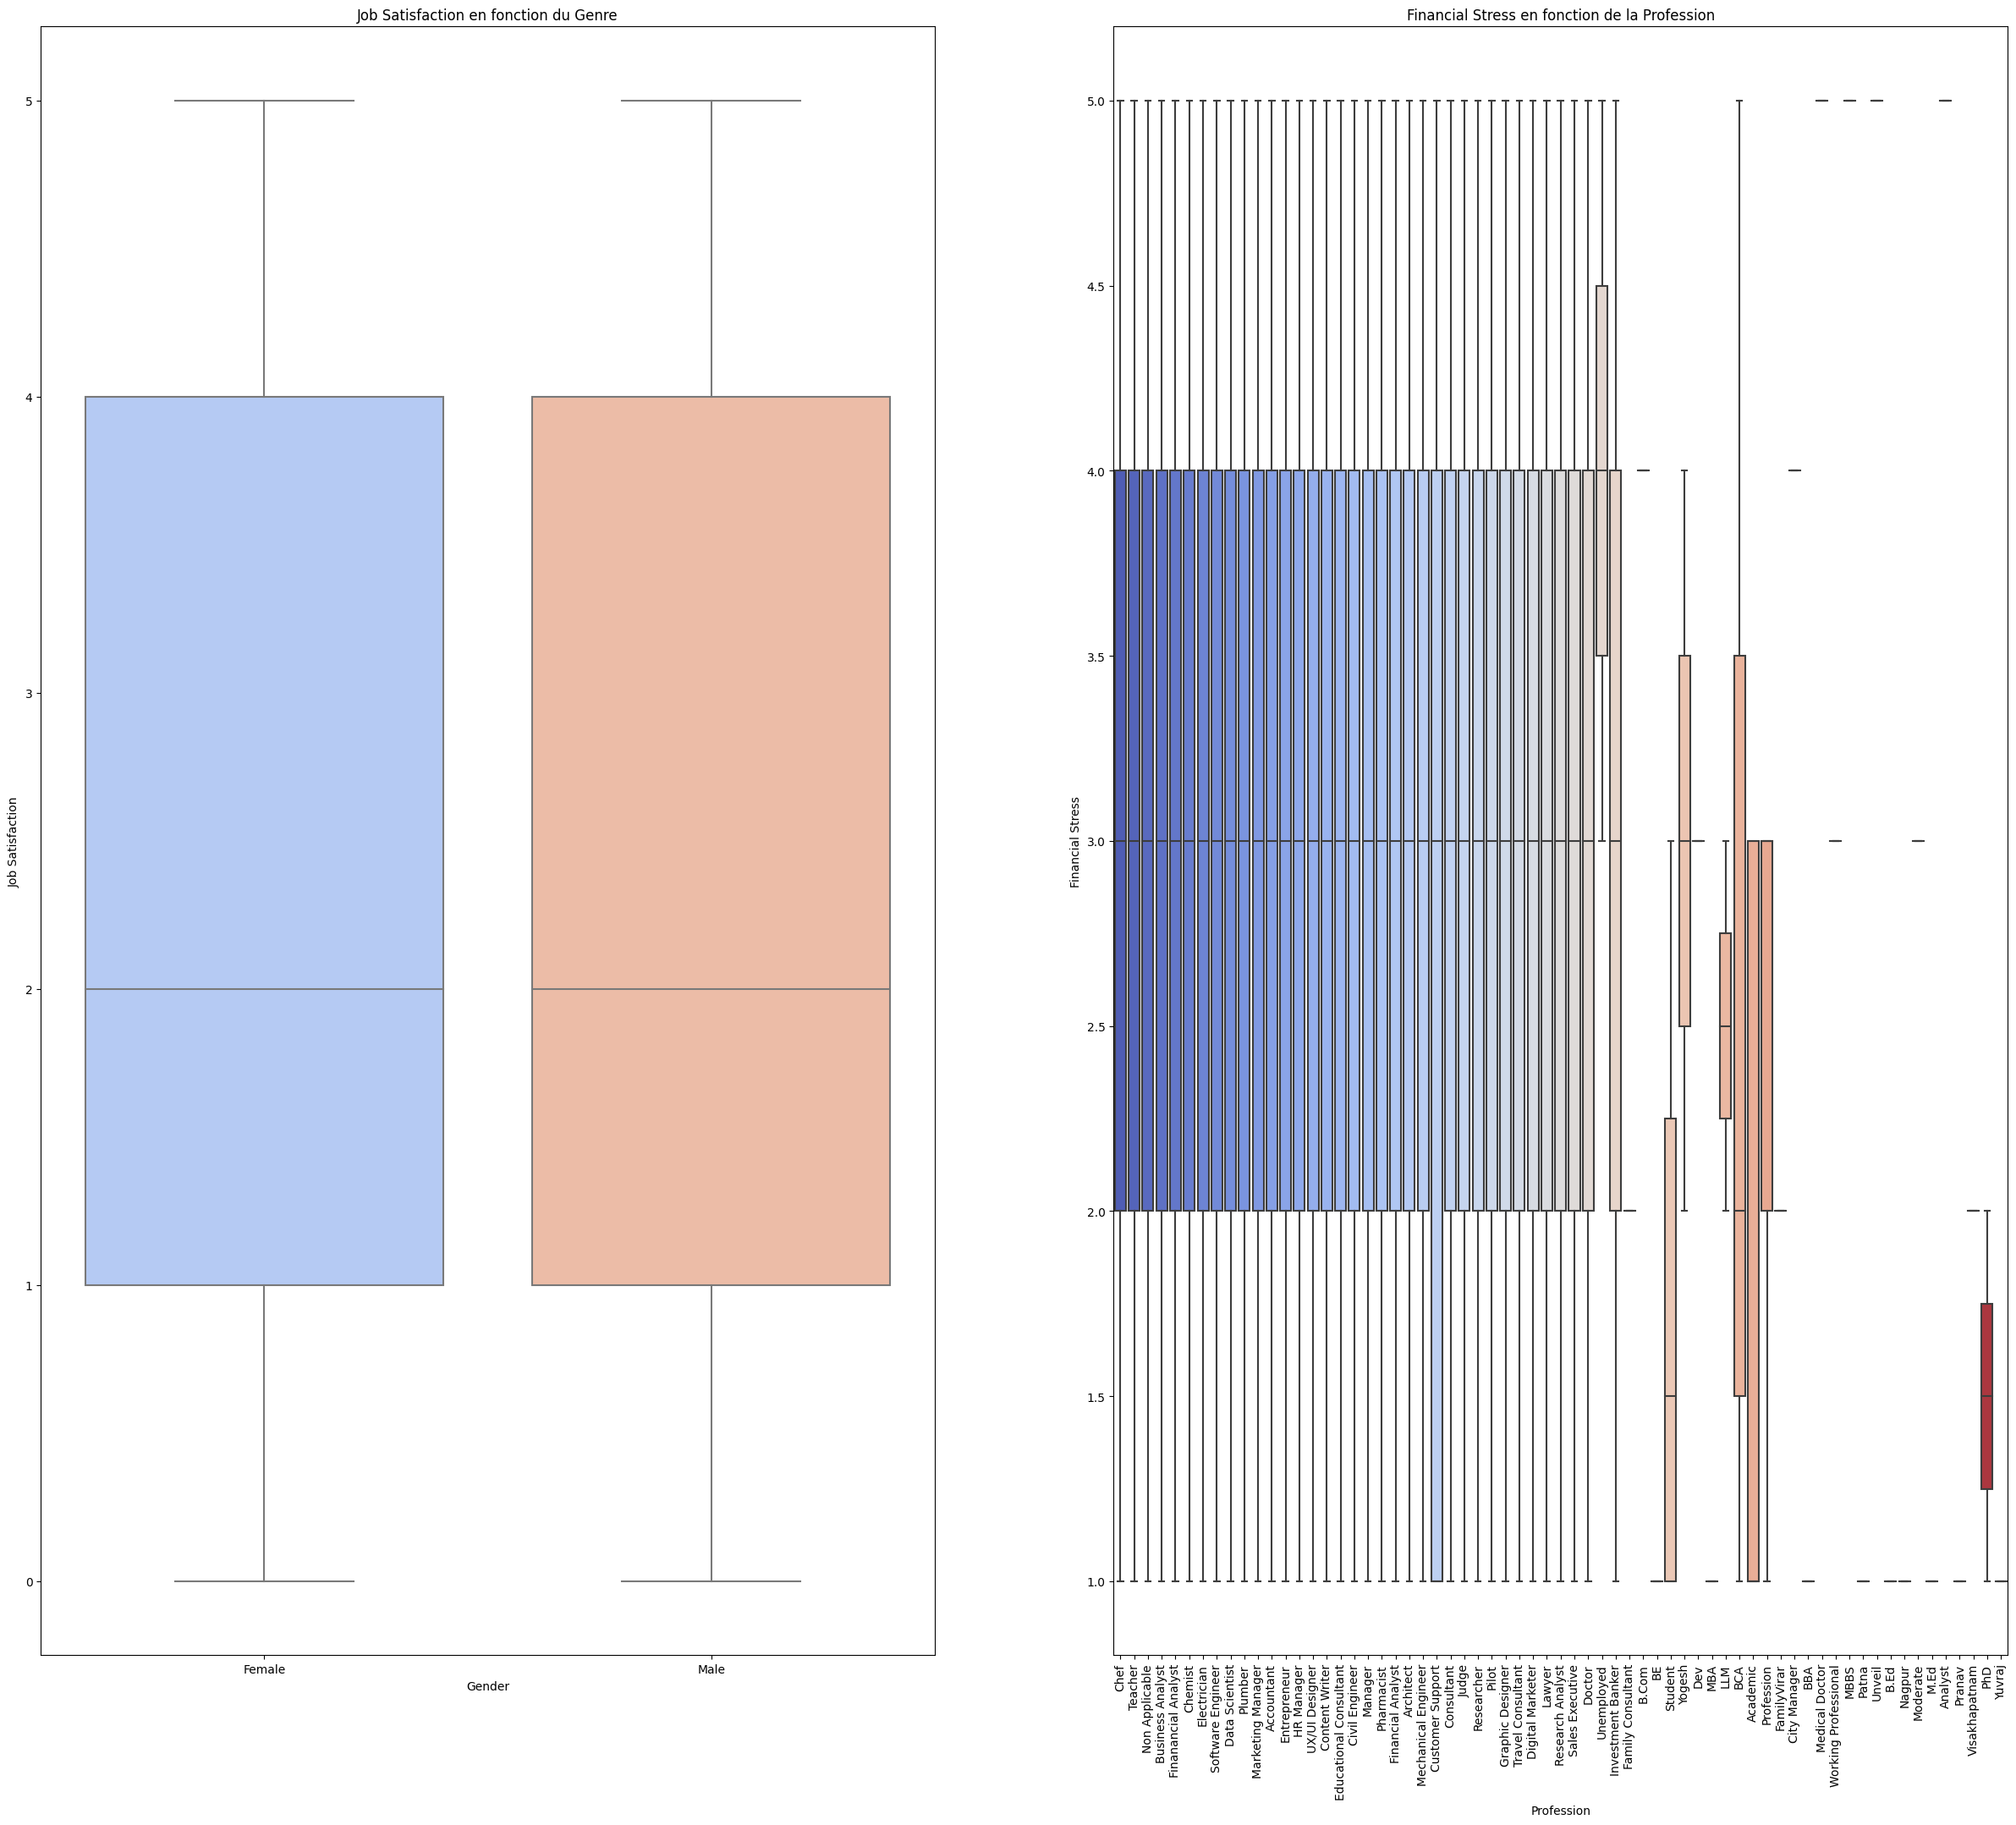

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(30, 25))

sns.boxplot(x='Gender', y='Job Satisfaction', data=train, palette='coolwarm', ax=axes[0])
axes[0].set_title("Job Satisfaction en fonction du Genre")
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Job Satisfaction')

sns.boxplot(x='Profession', y='Financial Stress', data=train, palette='coolwarm', ax=axes[1])
axes[1].set_title("Financial Stress en fonction de la Profession")
axes[1].set_xlabel('Profession')
axes[1].set_ylabel('Financial Stress')
axes[1].tick_params(axis='x', rotation=90)

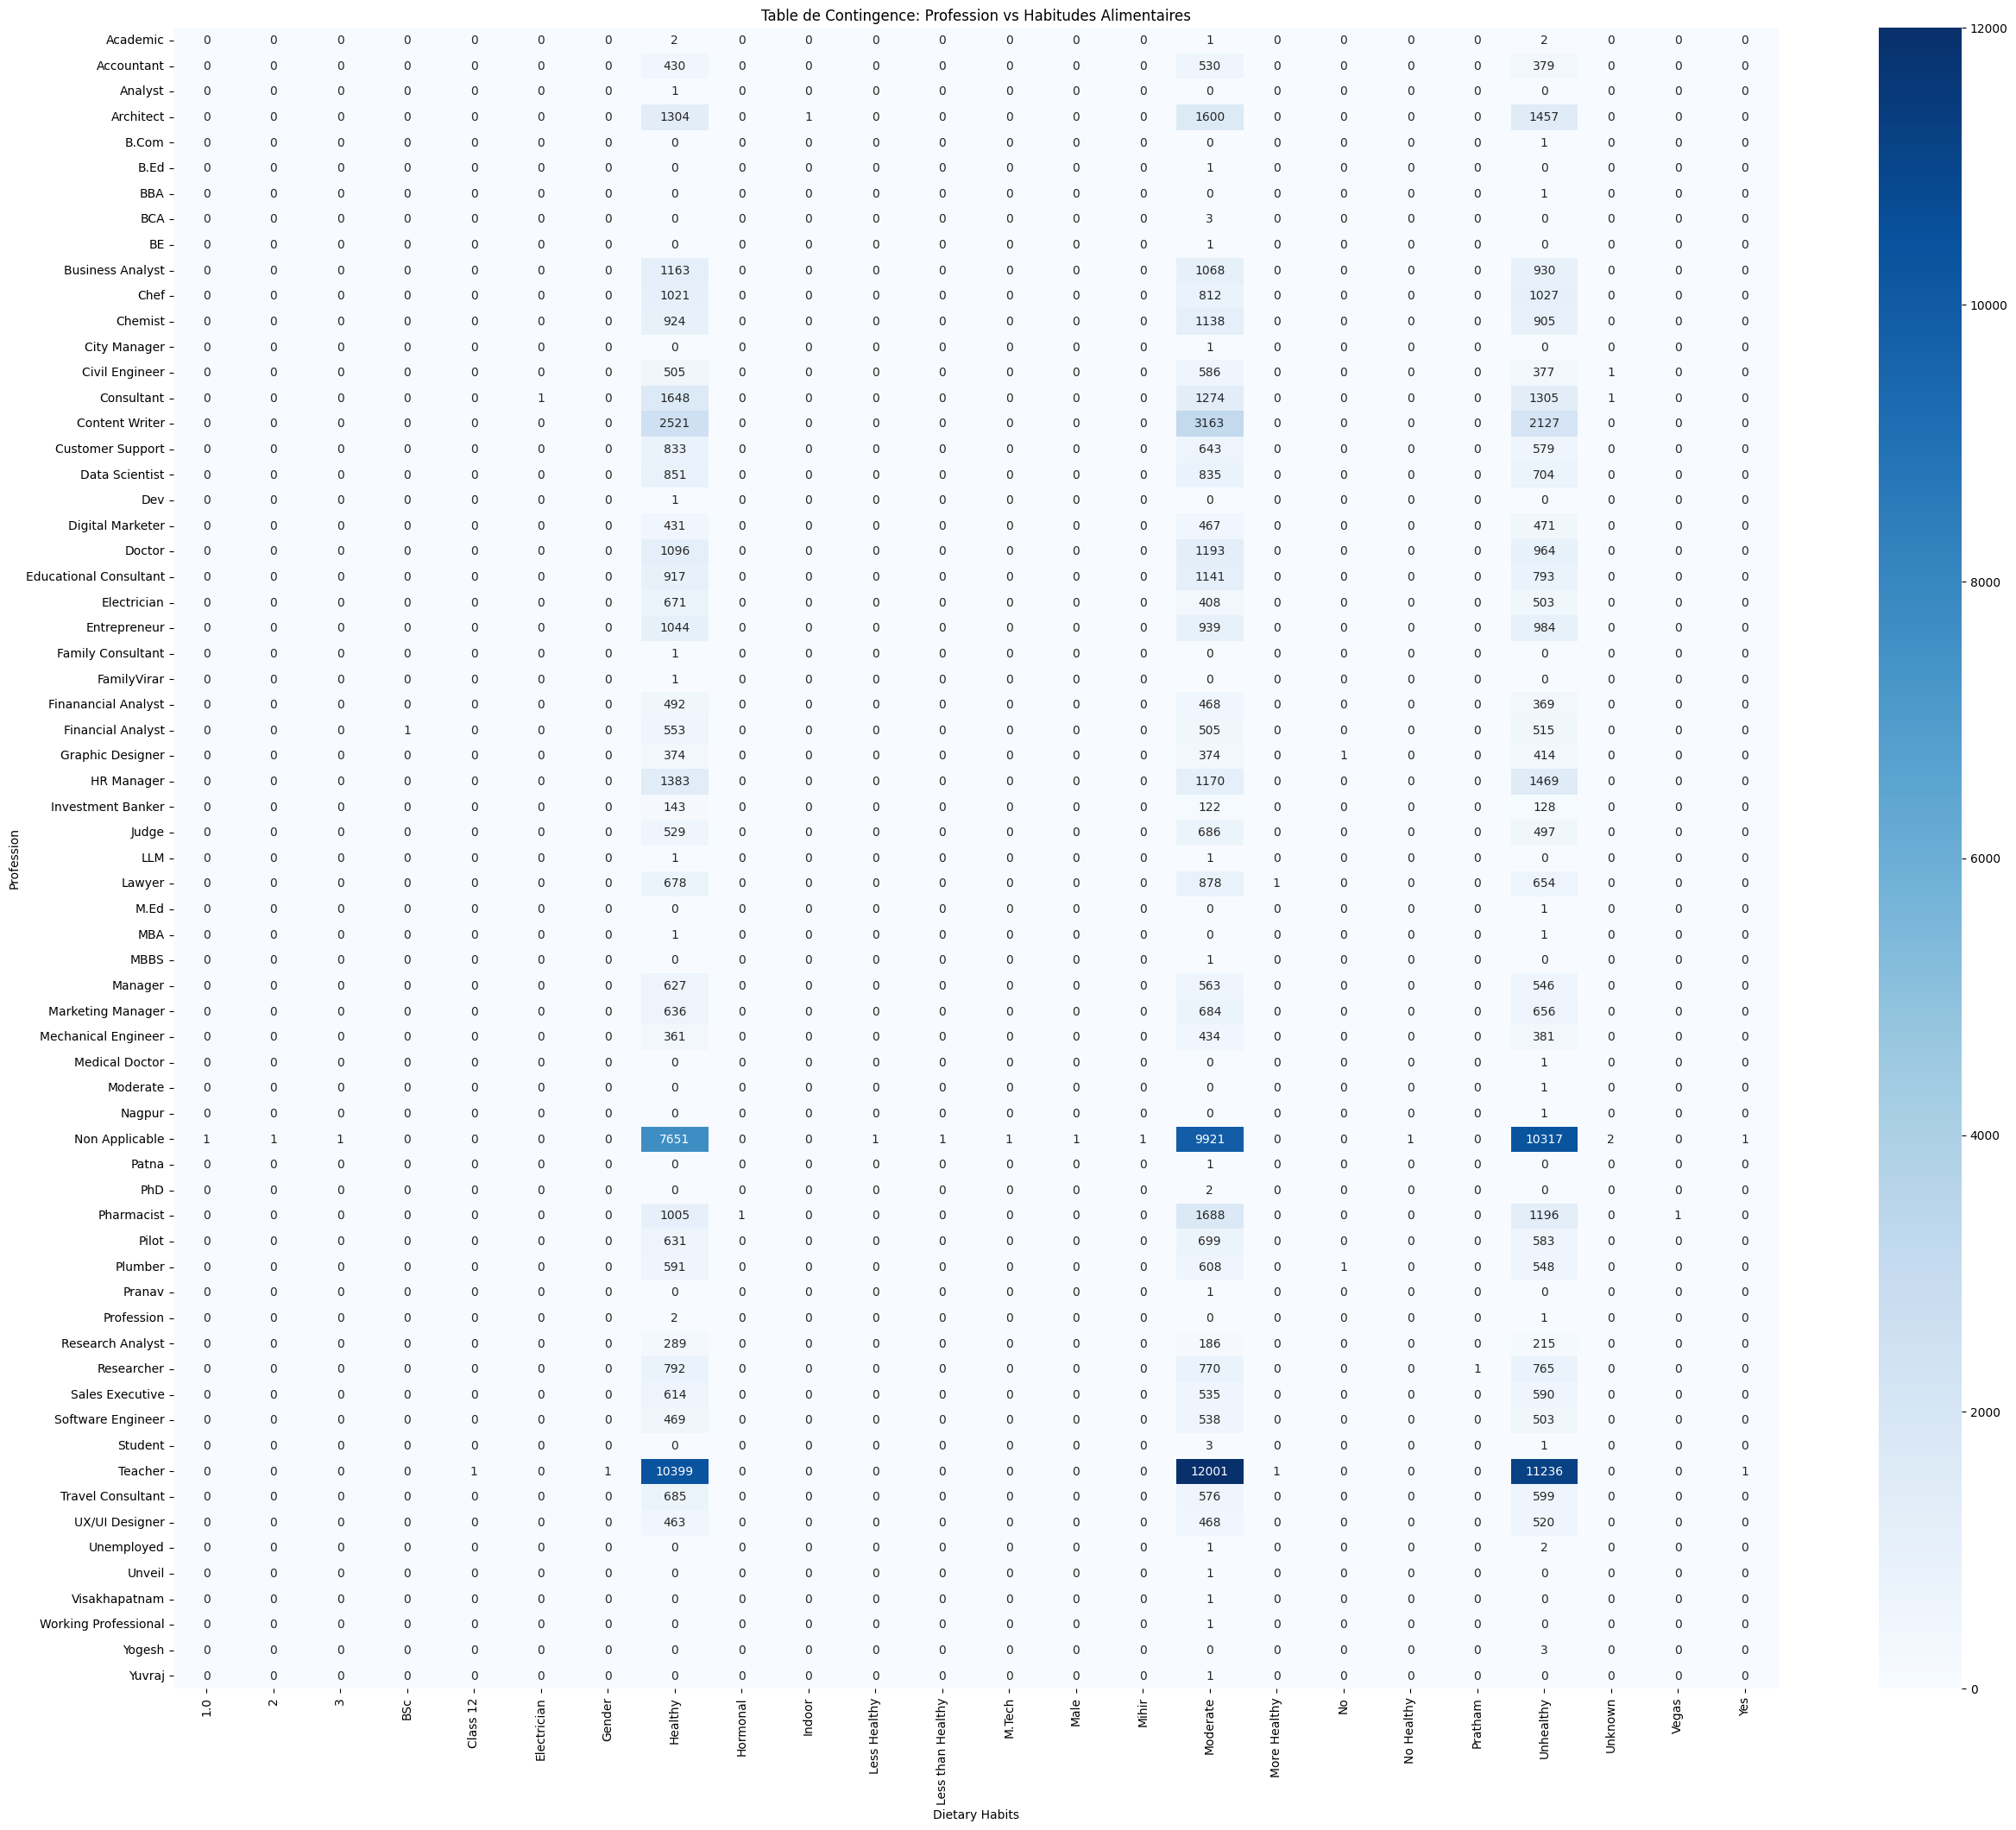

In [38]:
contingency_table = pd.crosstab(train['Profession'], train['Dietary Habits'])

plt.figure(figsize=(30, 25))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title("Table de Contingence: Profession vs Habitudes Alimentaires")
plt.xlabel('Dietary Habits')
plt.ylabel('Profession')
plt.show()


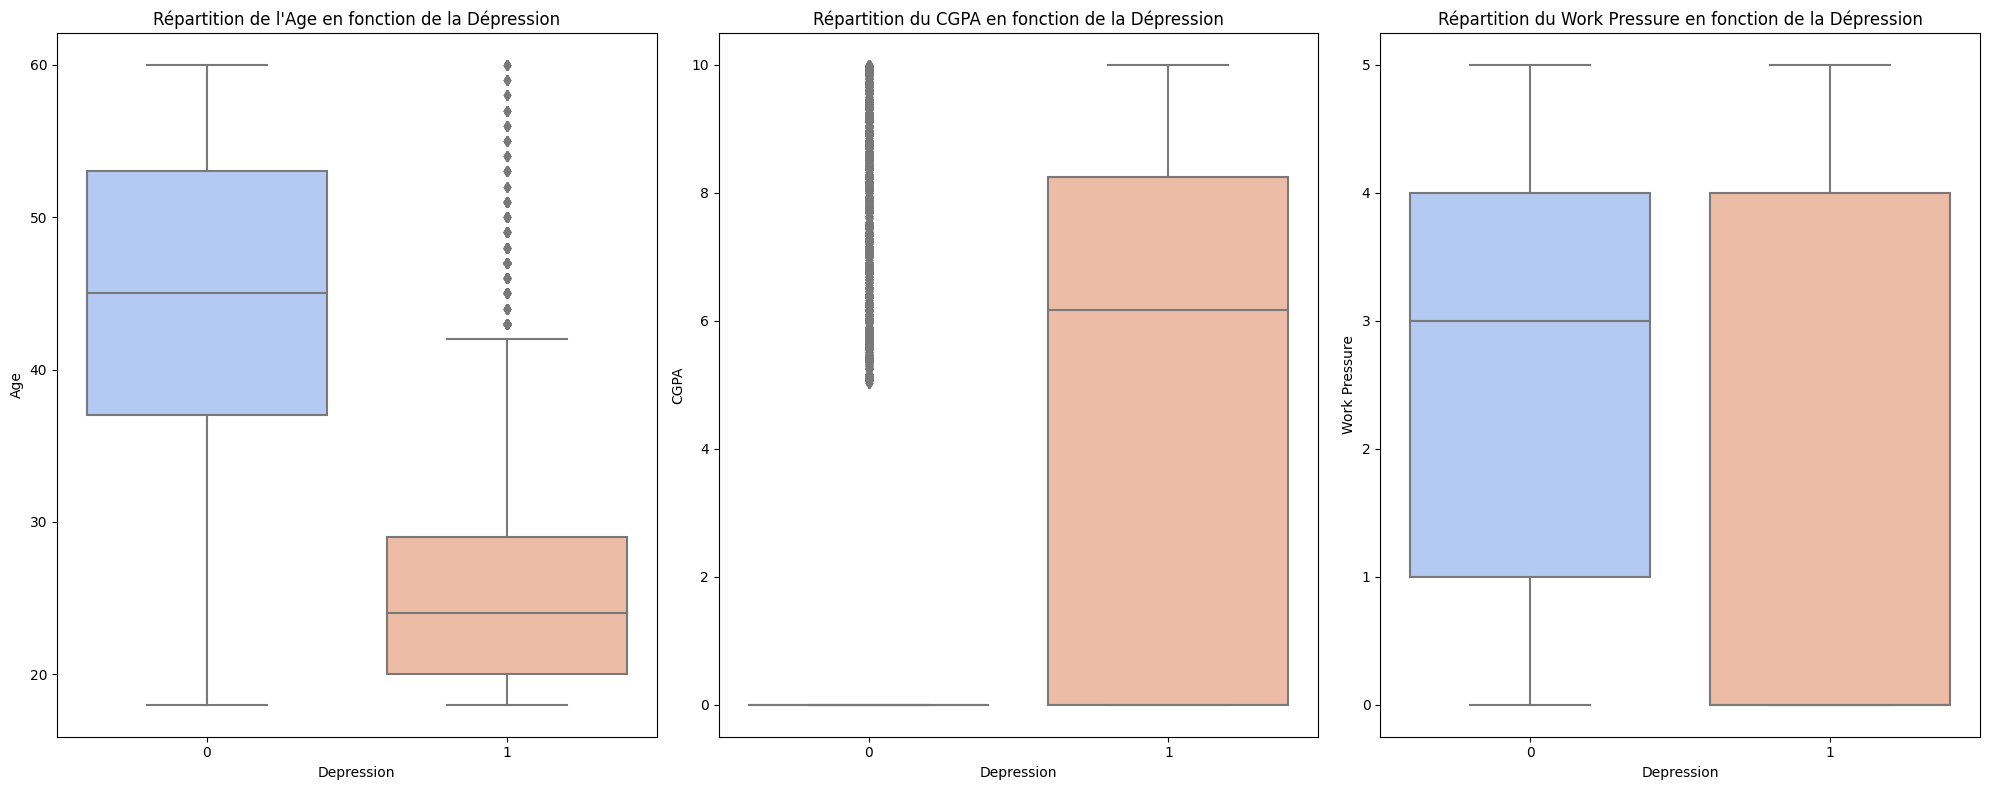

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x='Depression', y='Age', data=train, palette='coolwarm', ax=axes[0])
axes[0].set_title("Répartition de l'Age en fonction de la Dépression")
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Age')

sns.boxplot(x='Depression', y='CGPA', data=train, palette='coolwarm', ax=axes[1])
axes[1].set_title("Répartition du CGPA en fonction de la Dépression")
axes[1].set_xlabel('Depression')
axes[1].set_ylabel('CGPA')

sns.boxplot(x='Depression', y='Work Pressure', data=train, palette='coolwarm', ax=axes[2])
axes[2].set_title("Répartition du Work Pressure en fonction de la Dépression")
axes[2].set_xlabel('Depression')
axes[2].set_ylabel('Work Pressure')

plt.tight_layout()
plt.show()

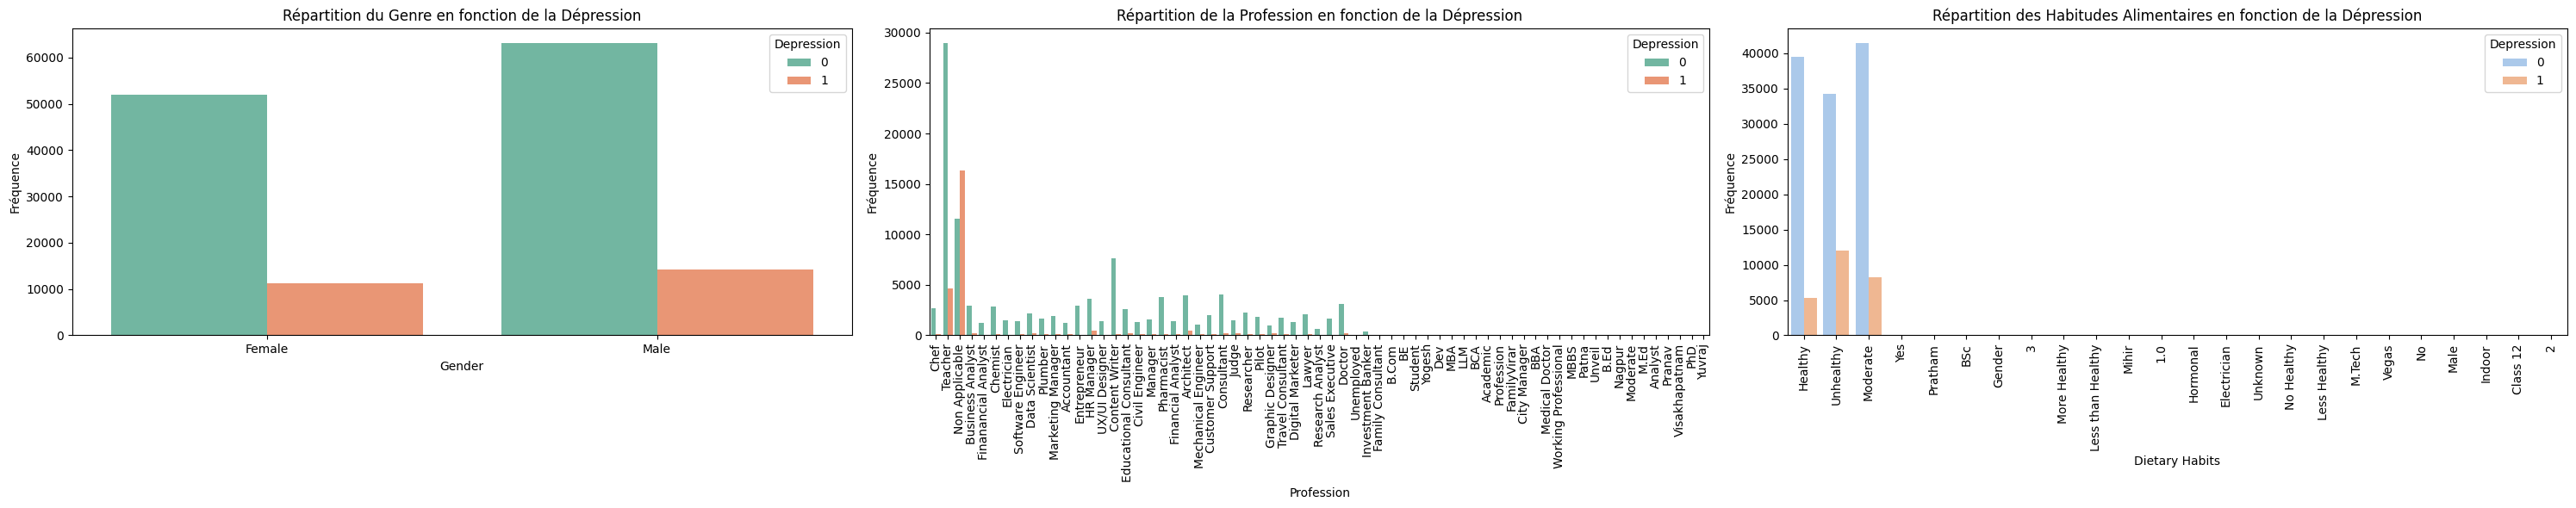

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6))

sns.countplot(x='Gender', hue='Depression', data=train, palette='Set2', ax=axes[0])
axes[0].set_title("Répartition du Genre en fonction de la Dépression")
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Fréquence')

sns.countplot(x='Profession', hue='Depression', data=train, palette='Set2', ax=axes[1])
axes[1].set_title("Répartition de la Profession en fonction de la Dépression")
axes[1].set_xlabel('Profession')
axes[1].set_ylabel('Fréquence')
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x='Dietary Habits', hue='Depression', data=train, palette='pastel', ax=axes[2])
axes[2].set_title("Répartition des Habitudes Alimentaires en fonction de la Dépression")
axes[2].set_xlabel('Dietary Habits')
axes[2].set_ylabel('Fréquence')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

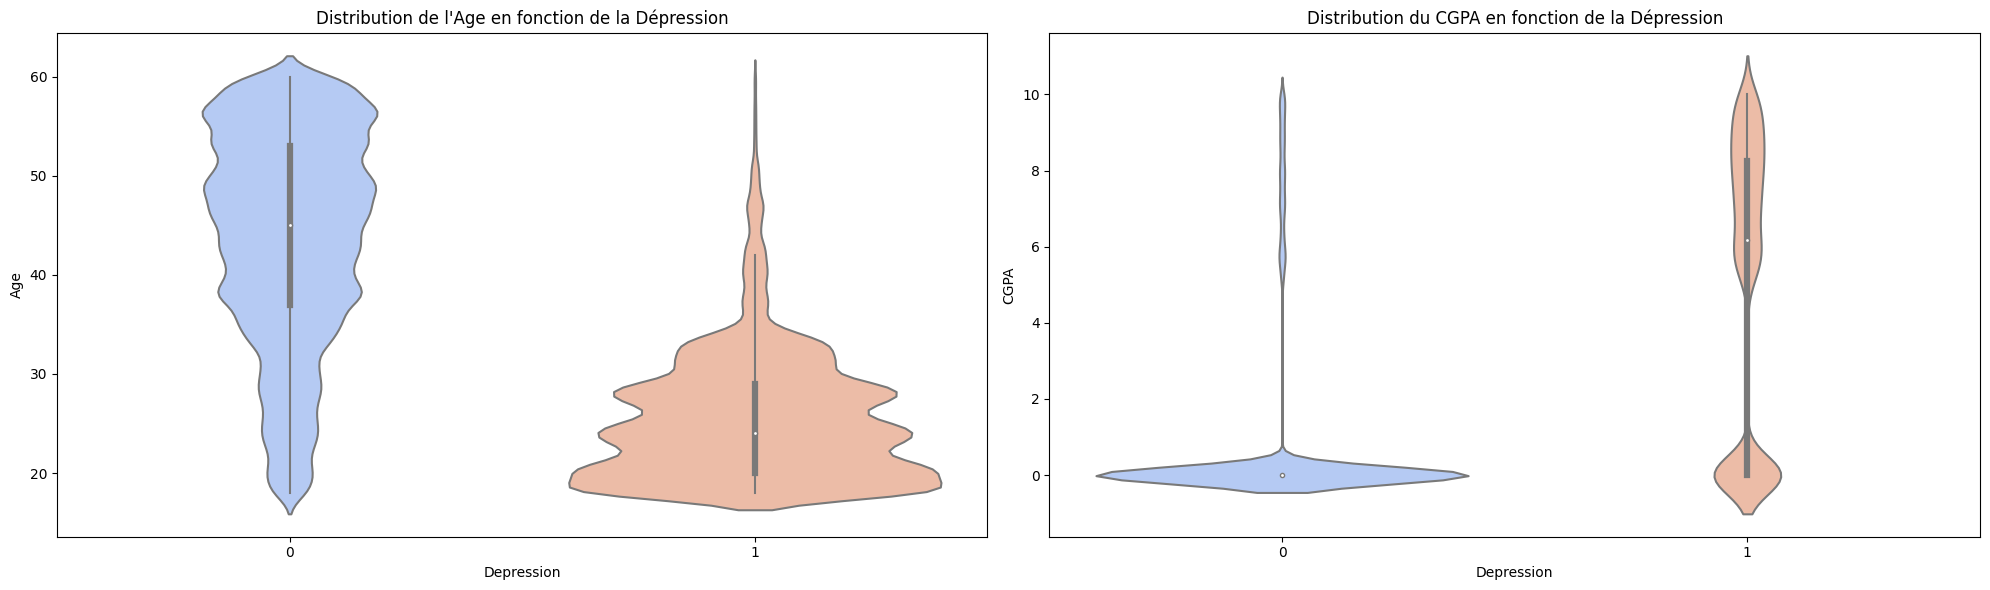

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.violinplot(x='Depression', y='Age', data=train, palette='coolwarm', ax=axes[0])
axes[0].set_title("Distribution de l'Age en fonction de la Dépression")
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Age')

sns.violinplot(x='Depression', y='CGPA', data=train, palette='coolwarm', ax=axes[1])
axes[1].set_title("Distribution du CGPA en fonction de la Dépression")
axes[1].set_xlabel('Depression')
axes[1].set_ylabel('CGPA')

plt.tight_layout()
plt.show()

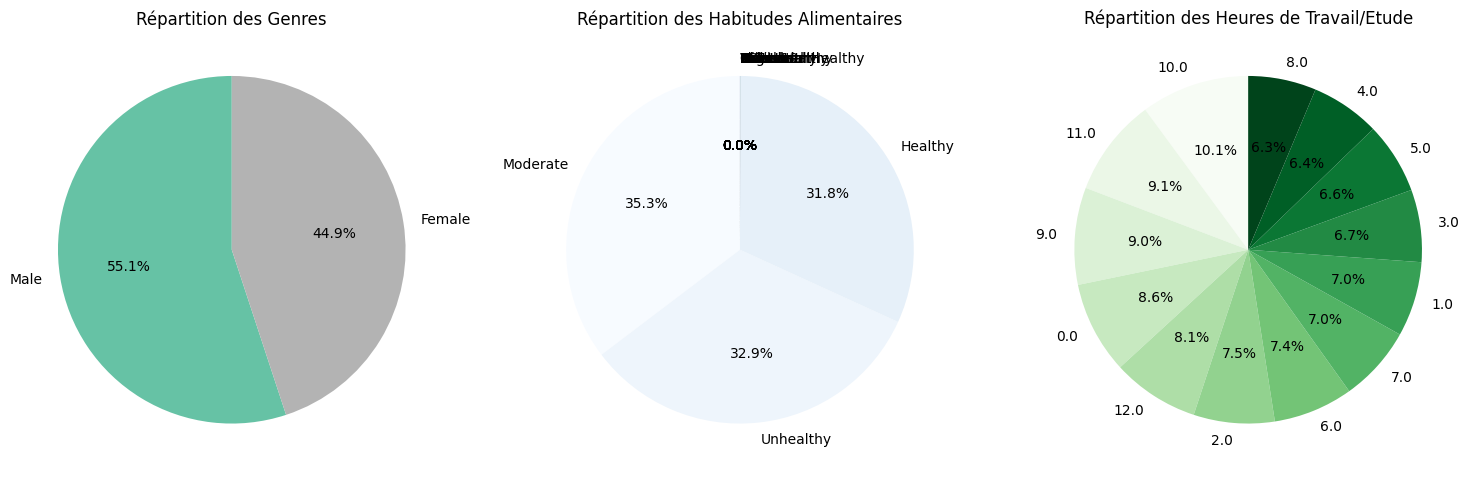

In [42]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)  
gender_counts = train['Gender'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title('Répartition des Genres')
plt.ylabel('')  

plt.subplot(1, 4, 2)  
dietary_habits_counts = train['Dietary Habits'].value_counts()
dietary_habits_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Blues', legend=False)
plt.title('Répartition des Habitudes Alimentaires')
plt.ylabel('')  

plt.subplot(1, 4, 3)  
work_study_hours_counts = train['Work/Study Hours'].value_counts()
work_study_hours_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Greens', legend=False)
plt.title('Répartition des Heures de Travail/Etude')
plt.ylabel('')  

plt.tight_layout()
plt.show()

# 4. Data Modelling

In [43]:
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [44]:
data_train = train.copy()
data_test = test.copy()

In [45]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Gender', 'Working Professional or Student', 'Profession', 
                       'Sleep Duration', 'Dietary Habits', 'Degree', 
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column in both train and test datasets
for column in categorical_columns:
    # Fit on the training data and transform both train and test data
    data_train[column] = encoder.fit_transform(data_train[column])
    data_test[column] = encoder.fit_transform(data_test[column])  # Use transform to avoid fitting again

# Now, both data_train and data_test have numeric values in place of categorical columns, preserving the dataset size.



data_test.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,1,53.0,Visakhapatnam,1,26,0.0,2.0,0.00,0.0,5.0,25,12,53,0,9.0,3.0,1
1,140701,Sanya,0,58.0,Kolkata,1,18,0.0,2.0,0.00,0.0,4.0,25,12,16,0,6.0,4.0,0
2,140702,Yash,1,53.0,Jaipur,1,55,0.0,4.0,0.00,0.0,1.0,16,12,12,1,12.0,4.0,0
3,140703,Nalini,0,23.0,Rajkot,0,40,5.0,0.0,6.84,1.0,0.0,27,12,35,1,10.0,4.0,0
4,140704,Shaurya,1,47.0,Kalyan,1,55,0.0,5.0,0.00,0.0,5.0,16,12,28,1,3.0,4.0,0
5,140705,Kartik,1,29.0,Mumbai,1,14,0.0,2.0,0.00,0.0,3.0,27,12,15,0,3.0,2.0,1
6,140706,Armaan,1,47.0,Visakhapatnam,1,55,0.0,1.0,0.00,0.0,1.0,25,5,65,0,10.0,3.0,1
7,140707,Ritika,0,28.0,Mumbai,1,14,0.0,5.0,0.00,0.0,3.0,16,5,25,1,0.0,2.0,0
8,140708,Navya,0,21.0,Surat,0,40,1.0,0.0,7.39,3.0,0.0,25,5,27,0,8.0,1.0,1
9,140709,Harsha,1,21.0,Jaipur,1,55,0.0,5.0,0.00,0.0,1.0,25,5,42,1,10.0,4.0,0


In [46]:
# Split the data into features (X) and target (y)
X = data_train.drop(['Depression', 'id', 'Name','City' ], axis=1)  
y = data_train['Depression']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
def objective(trial):
    # Select a model
    model_name = trial.suggest_categorical("model", ["LogisticRegression", "RandomForest", "XGBoost", "LightGBM"])
    
    if model_name == "LogisticRegression":
        # Hyperparameters for Logistic Regression
        params = {
            "C": trial.suggest_loguniform("C", 1e-4, 1e2),
            "solver": trial.suggest_categorical("solver", ["liblinear", "lbfgs"]),
            "max_iter": trial.suggest_int("max_iter", 100, 500),
        }
        model = LogisticRegression(**params, random_state=42)
    
    elif model_name == "RandomForest":
        # Hyperparameters for Random Forest
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        }
        model = RandomForestClassifier(**params, random_state=42)
    
    elif model_name == "XGBoost":
        # Hyperparameters for XGBoost
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        }
        model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss", random_state=42)
    
    elif model_name == "LightGBM":
        # Hyperparameters for LightGBM
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
            "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        }
        model = LGBMClassifier(**params, random_state=42)

    # Build a pipeline (scaling for Logistic Regression only)
    if model_name == "LogisticRegression":
        pipeline = Pipeline([("scaler", StandardScaler()), ("model", model)])
    else:
        pipeline = Pipeline([("model", model)])
    
    # Evaluate using cross-validation (ROC-AUC)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="roc_auc")
    return np.mean(scores)



In [48]:
# Create a study for optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Number of trials

# Print best trial
print("Best model and parameters:")
print(study.best_trial.params)

[I 2024-11-18 23:12:43,392] A new study created in memory with name: no-name-1946edeb-15cf-4a37-a5b0-107fb03060d8
[I 2024-11-18 23:13:24,504] Trial 0 finished with value: 0.9666969589031872 and parameters: {'model': 'RandomForest', 'n_estimators': 224, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9666969589031872.
[I 2024-11-18 23:14:39,057] Trial 1 finished with value: 0.9726548204127392 and parameters: {'model': 'RandomForest', 'n_estimators': 255, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 16}. Best is trial 1 with value: 0.9726548204127392.
[I 2024-11-18 23:14:40,261] Trial 2 finished with value: 0.9611189014053364 and parameters: {'model': 'LogisticRegression', 'C': 0.00013394092303517573, 'solver': 'liblinear', 'max_iter': 487}. Best is trial 1 with value: 0.9726548204127392.
[I 2024-11-18 23:14:59,421] Trial 3 finished with value: 0.9721647014089317 and parameters: {'model': 'XGBoost', 'n_estimators': 441, 'ma

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:20:12,351] Trial 10 finished with value: 0.9748025840406056 and parameters: {'model': 'LightGBM', 'n_estimators': 141, 'max_depth': 3, 'learning_rate': 0.27503443692790497, 'num_leaves': 27}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of neg

[I 2024-11-18 23:20:14,925] Trial 11 finished with value: 0.9747568335573312 and parameters: {'model': 'LightGBM', 'n_estimators': 103, 'max_depth': 3, 'learning_rate': 0.2974965896037257, 'num_leaves': 20}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:20:16,483] Trial 12 finished with value: 0.9740688054081982 and parameters: {'model': 'LightGBM', 'n_estimators': 53, 'max_depth': 3, 'learning_rate': 0.26249707193560046, 'num_leaves': 21}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:20:19,617] Trial 13 finished with value: 0.9746860987294669 and parameters: {'model': 'LightGBM', 'n_estimators': 147, 'max_depth': 3, 'learning_rate': 0.28624327661172067, 'num_leaves': 20}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003382 seconds.
You can set `force_row_wise=true`

[I 2024-11-18 23:20:24,747] Trial 14 finished with value: 0.9699105708343045 and parameters: {'model': 'LightGBM', 'n_estimators': 163, 'max_depth': 9, 'learning_rate': 0.012863800561537572, 'num_leaves': 44}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-18 23:20:27,478] Trial 15 finished with value: 0.9742389464449988 and parameters: {'model': 'LightGBM', 'n_estimators': 118, 'max_depth': 3, 'learning_rate': 0.12821702020024064, 'num_leaves': 98}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

[I 2024-11-18 23:20:35,304] Trial 16 finished with value: 0.9723495387626071 and parameters: {'model': 'LightGBM', 'n_estimators': 306, 'max_depth': 8, 'learning_rate': 0.14847840093395626, 'num_leaves': 45}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-18 23:20:40,285] Trial 17 finished with value: 0.968562457413522 and parameters: {'model': 'LightGBM', 'n_estimators': 206, 'max_depth': 13, 'learning_rate': 0.2733313269729378, 'num_leaves': 37}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:20:48,812] Trial 18 finished with value: 0.9743560545457914 and parameters: {'model': 'LightGBM', 'n_estimators': 307, 'max_depth': 5, 'learning_rate': 0.08241879261350339, 'num_leaves': 69}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-18 23:20:52,176] Trial 19 finished with value: 0.9729100046983353 and parameters: {'model': 'LightGBM', 'n_estimators': 94, 'max_depth': 11, 'learning_rate': 0.16529377093274897, 'num_leaves': 67}. Best is trial 10 with value: 0.9748025840406056.
[I 2024-11-18 23:20:53,892] Trial 20 finished with value: 0.9727430421168772 and parameters: {'model': 'LogisticRegression', 'C': 93.77299984783657, 'solver': 'liblinear', 'max_iter': 100}. Best is trial 10 with value: 0.9748025840406056.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:20:57,230] Trial 21 finished with value: 0.974808929292668 and parameters: {'model': 'LightGBM', 'n_estimators': 159, 'max_depth': 3, 'learning_rate': 0.29343938066672376, 'num_leaves': 20}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:21:02,323] Trial 22 finished with value: 0.9739890389904076 and parameters: {'model': 'LightGBM', 'n_estimators': 189, 'max_depth': 5, 'learning_rate': 0.17697752277134385, 'num_leaves': 28}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-18 23:21:05,439] Trial 23 finished with value: 0.9714973719852873 and parameters: {'model': 'LightGBM', 'n_estimators': 105, 'max_depth': 8, 'learning_rate': 0.2968959375262276, 'num_leaves': 34}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:21:08,459] Trial 24 finished with value: 0.9746239159590802 and parameters: {'model': 'LightGBM', 'n_estimators': 115, 'max_depth': 4, 'learning_rate': 0.19800521405966115, 'num_leaves': 21}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-18 23:21:15,133] Trial 25 finished with value: 0.9742240067505964 and parameters: {'model': 'LightGBM', 'n_estimators': 242, 'max_depth': 7, 'learning_rate': 0.07704638696187857, 'num_leaves': 32}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:21:20,131] Trial 26 finished with value: 0.9699822523578593 and parameters: {'model': 'LightGBM', 'n_estimators': 178, 'max_depth': 4, 'learning_rate': 0.018284390601218982, 'num_leaves': 52}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

[I 2024-11-18 23:21:22,467] Trial 27 finished with value: 0.9745313257941726 and parameters: {'model': 'LightGBM', 'n_estimators': 93, 'max_depth': 3, 'learning_rate': 0.2116886036547351, 'num_leaves': 28}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-11-18 23:21:25,616] Trial 28 finished with value: 0.9743429868679183 and parameters: {'model': 'XGBoost', 'n_estimators': 135, 'max_depth': 5, 'learning_rate': 0.12391320951711614, 'subsample': 0.5050723318134914}. Best is trial 21 with value: 0.974808929292668.
[I 2024-11-18 23:21:26,551] Trial 29 finished with value: 0.9659109440743114 and parameters: {'model': 'LogisticRegression', 'C': 0.00021431753486406415, 'solver': 'lbfgs', 'max_iter': 422}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-18 23:21:34,869] Trial 30 finished with value: 0.9701100087390137 and parameters: {'model': 'LightGBM', 'n_estimators': 290, 'max_depth': 17, 'learning_rate': 0.20806576924500642, 'num_leaves': 81}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:21:37,986] Trial 31 finished with value: 0.9747949193879343 and parameters: {'model': 'LightGBM', 'n_estimators': 146, 'max_depth': 3, 'learning_rate': 0.2872408613447383, 'num_leaves': 20}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:21:40,483] Trial 32 finished with value: 0.9745253963096288 and parameters: {'model': 'LightGBM', 'n_estimators': 86, 'max_depth': 4, 'learning_rate': 0.21660087809611117, 'num_leaves': 20}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:21:45,875] Trial 33 finished with value: 0.9729534879794972 and parameters: {'model': 'LightGBM', 'n_estimators': 208, 'max_depth': 5, 'learning_rate': 0.23731359115541412, 'num_leaves': 27}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-18 23:21:50,453] Trial 34 finished with value: 0.9712811253924677 and parameters: {'model': 'LightGBM', 'n_estimators': 141, 'max_depth': 7, 'learning_rate': 0.29512277226193223, 'num_leaves': 40}. Best is trial 21 with value: 0.974808929292668.
[I 2024-11-18 23:22:18,241] Trial 35 finished with value: 0.951251785748231 and parameters: {'model': 'RandomForest', 'n_estimators': 229, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 21 with value: 0.974808929292668.
[I 2024-11-18 23:22:20,005] Trial 36 finished with value: 0.9727424489563361 and parameters: {'model': 'LogisticRegression', 'C': 0.03814450238242817, 'solver': 'lbfgs', 'max_iter': 319}. Best is trial 21 with value: 0.974808929292668.
[I 2024-11-18 23:22:23,296] Trial 37 finished with value: 0.9736416617786169 and parameters: {'model': 'XGBoost', 'n_estimators': 79, 'max_depth': 7, 'learning_rate': 0.16597238924190888, 'subsample': 0.7846025159964495}. Best is trial 21 with value: 0.97

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:22:29,785] Trial 38 finished with value: 0.9732732244528799 and parameters: {'model': 'LightGBM', 'n_estimators': 261, 'max_depth': 4, 'learning_rate': 0.025507441508697742, 'num_leaves': 28}. Best is trial 21 with value: 0.974808929292668.
[I 2024-11-18 23:23:02,804] Trial 39 finished with value: 0.9665593115038817 and parameters: {'model': 'RandomForest', 'n_estimators': 180, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:23:11,724] Trial 40 finished with value: 0.9747577336393715 and parameters: {'model': 'LightGBM', 'n_estimators': 397, 'max_depth': 4, 'learning_rate': 0.06155715738466996, 'num_leaves': 26}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:23:20,872] Trial 41 finished with value: 0.9747635992487395 and parameters: {'model': 'LightGBM', 'n_estimators': 398, 'max_depth': 4, 'learning_rate': 0.0543203425231082, 'num_leaves': 26}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2024-11-18 23:23:31,994] Trial 42 finished with value: 0.9745080426578673 and parameters: {'model': 'LightGBM', 'n_estimators': 395, 'max_depth': 5, 'learning_rate': 0.054614675525580664, 'num_leaves': 31}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-11-18 23:23:41,523] Trial 43 finished with value: 0.9745042097746843 and parameters: {'model': 'LightGBM', 'n_estimators': 388, 'max_depth': 4, 'learning_rate': 0.0354487924832642, 'num_leaves': 26}. Best is trial 21 with value: 0.974808929292668.
[I 2024-11-18 23:23:49,914] Trial 44 finished with value: 0.9744530626539328 and parameters: {'model': 'XGBoost', 'n_estimators': 353, 'max_depth': 6, 'learning_rate': 0.05076335812112194, 'subsample': 0.5427493745112733}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:24:01,276] Trial 45 finished with value: 0.974704021626142 and parameters: {'model': 'LightGBM', 'n_estimators': 493, 'max_depth': 4, 'learning_rate': 0.07047356981931739, 'num_leaves': 35}. Best is trial 21 with value: 0.974808929292668.
[I 2024-11-18 23:25:07,399] Trial 46 finished with value: 0.9667712704550869 and parameters: {'model': 'RandomForest', 'n_estimators': 361, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 21 with value: 0.974808929292668.
[I 2024-11-18 23:25:09,046] Trial 47 finished with value: 0.9727351745095862 and parameters: {'model': 'LogisticRegression', 'C': 0.034512463310803466, 'solver': 'liblinear', 'max_iter': 312}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-18 23:25:17,107] Trial 48 finished with value: 0.9744225385575962 and parameters: {'model': 'LightGBM', 'n_estimators': 415, 'max_depth': 3, 'learning_rate': 0.04149550223558055, 'num_leaves': 25}. Best is trial 21 with value: 0.974808929292668.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 90032, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181569 -> initscore=-1.505755
[LightGBM] [Info] Start training from score -1.505755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16347, number of negative: 73685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-18 23:25:28,386] Trial 49 finished with value: 0.972029177818932 and parameters: {'model': 'LightGBM', 'n_estimators': 483, 'max_depth': 13, 'learning_rate': 0.11587548779391645, 'num_leaves': 51}. Best is trial 21 with value: 0.974808929292668.


Best model and parameters:
{'model': 'LightGBM', 'n_estimators': 159, 'max_depth': 3, 'learning_rate': 0.29343938066672376, 'num_leaves': 20}


In [49]:
# Retrieve the best model and parameters
best_params = study.best_trial.params
best_model_name = best_params.pop("model")

if best_model_name == "LogisticRegression":
    final_model = LogisticRegression(**best_params, random_state=42)
elif best_model_name == "RandomForest":
    final_model = RandomForestClassifier(**best_params, random_state=42)
elif best_model_name == "XGBoost":
    final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss", random_state=42)
elif best_model_name == "LightGBM":
    final_model = LGBMClassifier(**best_params, random_state=42)

# Train the model on the full training data
if best_model_name == "LogisticRegression":
    pipeline = Pipeline([("scaler", StandardScaler()), ("model", final_model)])
else:
    pipeline = Pipeline([("model", final_model)])

pipeline.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation ROC-AUC: {roc_auc:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20433, number of negative: 92107
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 112540, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181562 -> initscore=-1.505800
[LightGBM] [Info] Start training from score -1.505800
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [50]:
# Predict on test set
test_predictions = pipeline.predict(data_test.drop(columns=['id', 'Name','City' ]))

# Create submission DataFrame
submission = pd.DataFrame({
    "id": data_test["id"],
    "Depression": ["1" if pred == 1 else "0" for pred in test_predictions]
})

# Save submission file
submission.to_csv("playgroud_nov7.csv", index=False)
print("playgroud_nov7.csv")


playgroud_nov7.csv
